<a href="https://colab.research.google.com/github/sarahmcg1/hello-world/blob/master/Copy_of_Seahorse_code_from_Adrian_onTitrationData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas, seaborn, numpy

import scipy, scipy.stats

import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 'font.family':'sans-serif', 'xtick.labelsize':20, 'ytick.labelsize':20, 'figure.figsize':(12, 8)})
#matplotlib.rcParams.update({'font.size':20,'xtick.labelsize':20, 'ytick.labelsize':20, 'figure.figsize':(12, 8)})

#**0. user-defined variables**

In [ ]:
input_file = '/content/Catecholamine Titration 07.11.23-Results.xlsx'

#**1. read data**
##**1.1. OCR**


In [ ]:
df = pandas.read_excel(input_file, sheet_name='Normalized Rate (Columns)', skiprows=8, nrows=27)
#df = pandas.read_excel(input_file, sheet_name='Rate (Columns)', skiprows=8, nrows=27)
df.rename(columns={'Unnamed: 0':'time'}, inplace=True)

print('before trimming')
print(df.columns)

columns2drop = [element for element in df.columns.to_list() if 'Unnamed' in element]
print(columns2drop)
df.drop(labels=columns2drop, axis='columns', inplace=True)

print()
print('after trimming')
print(df.columns)

ocr=df

before trimming
Index(['time', 'B02', 'C02', 'D02', 'E02', 'F02', 'G02', 'Unnamed: 7', 'B11',
       'C11', 'D11', 'E11', 'F11', 'G11', 'Unnamed: 14', 'B03', 'B04', 'B05',
       'B06', 'B07', 'B08', 'B09', 'B10', 'Unnamed: 23', 'C03', 'C04', 'C05',
       'C06', 'C07', 'C08', 'C09', 'C10', 'Unnamed: 32', 'D03', 'D04', 'D05',
       'D06', 'D07', 'D08', 'D09', 'D10', 'Unnamed: 41', 'E03', 'E04', 'E05',
       'E06', 'E07', 'E08', 'E09', 'E10', 'Unnamed: 50', 'F03', 'F04', 'F05',
       'F06', 'F07', 'F08', 'F09', 'F10', 'Unnamed: 59', 'G03', 'G04', 'G05',
       'G06', 'G07', 'G08', 'G09', 'G10'],
      dtype='object')
['Unnamed: 7', 'Unnamed: 14', 'Unnamed: 23', 'Unnamed: 32', 'Unnamed: 41', 'Unnamed: 50', 'Unnamed: 59']

after trimming
Index(['time', 'B02', 'C02', 'D02', 'E02', 'F02', 'G02', 'B11', 'C11', 'D11',
       'E11', 'F11', 'G11', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B09',
       'B10', 'C03', 'C04', 'C05', 'C06', 'C07', 'C08', 'C09', 'C10', 'D03',
       'D04', 'D05',

In [ ]:
ocr

time        B02        C02        D02        E02        F02  \
0     1.311087  52.774498  56.777012  48.391472  56.752513  48.179561   
1     7.765630  50.053143  53.384714  45.364964  53.768829  44.641133   
2    14.217592  48.821706  52.094956  43.748366  52.934443  43.168202   
3    20.670905  49.863525  53.151115  44.370357  53.122670  42.997889   
4    27.123251  48.244049  52.948489  44.072399  52.852225  42.861249   
5    33.573819  48.427556  52.772184  43.557542  52.716368  43.352177   
6    40.099028  49.018842  53.623487  43.364110  53.992457  42.722404   
7    56.590323  50.860116  55.748269  45.701280  55.398879  45.166696   
8    73.095036  51.936552  57.664736  46.896888  56.600258  46.336487   
9    89.599479  51.659210  57.127774  46.887288  56.375245  45.337452   
10  106.106102  52.325810  57.890849  46.647766  56.723250  46.593249   
11  122.618719  53.208961  58.604092  47.117684  57.266765  46.813329   
12  139.137260  52.508422  57.538339  46.973111  56.934638  46.703614   
13  155.658425  52.567041  58.476874  46.970410  57.491923  47.014510   
14  172.178852  52.995183  58.000481  47.542866  57.729410  48.115888   
15  188.690180  52.791784  58.296296  46.816899  58.027934  49.015046   
16  205.210874  53.151223  58.474878  46.987331  57.927372  48.454505   
17  211.751346  19.571192  24.644048  18.661582  22.797888  15.918073   
18  218.210120  18.776168  23.652745  17.860873  21.988193  14.084855   
19  224.672777  19.256169  23.592027  18.372110  21.282741  14.954774   
20  231.215598  79.190302  66.628032  59.439651  75.210860  69.946893   
21  237.678273  75.722809  62.019591  56.144925  71.886910  67.003012   
22  244.140587  73.494024  65.764932  58.472270  74.699426  65.533824   
23  250.684415  12.843323  17.835000  12.795440  16.062081   9.934363   
24  257.142605  12.758379  17.298897  12.907683  14.148336   8.941409   
25  263.604483  13.184379  17.167253  12.229151  15.109590   9.079245   

          G02        B11        C11        D11  ...        F09        F10  \
0   56.124939  49.622814  48.364288  45.703526  ...  55.380545  51.013487   
1   49.561363  46.959108  43.559477  43.451096  ...  51.041928  47.685342   
2   50.911284  46.151115  41.472588  42.273543  ...  50.693920  47.096605   
3   52.189994  46.594044  42.666391  43.584255  ...  50.601030  48.009402   
4   51.084501  47.030583  40.871844  42.890830  ...  50.501543  48.055724   
5   51.603153  45.721750  41.568068  42.833649  ...  49.775067  47.966997   
6   53.288528  46.712989  42.118255  43.082115  ...  49.642810  48.151450   
7   54.976329  48.819384  45.967398  45.024655  ...  54.636327  50.093776   
8   56.343785  48.678402  46.966441  45.987157  ...  55.351432  50.954296   
9   55.913637  48.949325  47.078903  47.084487  ...  56.426151  52.124799   
10  55.797314  50.286429  48.624381  47.132369  ...  58.793795  53.069456   
11  56.797227  48.856199  47.975399  46.536182  ...  58.062181  53.497564   
12  56.373628  49.270673  48.423854  47.307970  ...  59.686636  54.550949   
13  56.131345  50.260407  48.216645  47.433854  ...  59.651462  54.526505   
14  57.473779  50.026153  49.492380  48.387670  ...  60.142146  55.169665   
15  57.546273  49.496776  48.022845  47.751725  ...  59.357685  54.828602   
16  56.921545  49.857845  49.799229  48.621294  ...  58.676827  54.869029   
17  24.142991  17.718816  18.653097  16.248766  ...  21.264193  20.636160   
18  24.179908  17.157860  18.163405  16.602051  ...  20.489913  21.759349   
19  24.054655  18.642939  18.696951  16.827893  ...  19.257273  20.415961   
20  69.983008  60.261471  48.484582  60.160839  ...  75.257233  74.453290   
21  64.746529  61.055280  56.321953  61.310529  ...  75.040541  71.139207   
22  67.254128  62.930201  60.183710  61.969101  ...  74.491133  70.892944   
23  19.390929  11.618238  13.606645  10.967468  ...  13.447175  13.848376   
24  17.963953  12.569188  14.062955  12.384430  ...  13.011647  15.140393   
25  17.863973  11.885490  11.688663 

##**1.2. ECAR**

In [ ]:
df = pandas.read_excel(input_file, sheet_name='Normalized Rate (Columns)', skiprows=39, nrows=27)
#df = pandas.read_excel(input_file, sheet_name='Rate (Columns)', skiprows=39, nrows=27)
df.rename(columns={'Unnamed: 0':'time'}, inplace=True)

print('before trimming')
print(df.columns)

columns2drop = [element for element in df.columns.to_list() if 'Unnamed' in element]
print(columns2drop)
df.drop(labels=columns2drop, axis='columns', inplace=True)

print()
print('after trimming')
print(df.columns)

ecar=df

before trimming
Index(['time', 'B02', 'C02', 'D02', 'E02', 'F02', 'G02', 'Unnamed: 7', 'B11',
       'C11', 'D11', 'E11', 'F11', 'G11', 'Unnamed: 14', 'B03', 'B04', 'B05',
       'B06', 'B07', 'B08', 'B09', 'B10', 'Unnamed: 23', 'C03', 'C04', 'C05',
       'C06', 'C07', 'C08', 'C09', 'C10', 'Unnamed: 32', 'D03', 'D04', 'D05',
       'D06', 'D07', 'D08', 'D09', 'D10', 'Unnamed: 41', 'E03', 'E04', 'E05',
       'E06', 'E07', 'E08', 'E09', 'E10', 'Unnamed: 50', 'F03', 'F04', 'F05',
       'F06', 'F07', 'F08', 'F09', 'F10', 'Unnamed: 59', 'G03', 'G04', 'G05',
       'G06', 'G07', 'G08', 'G09', 'G10'],
      dtype='object')
['Unnamed: 7', 'Unnamed: 14', 'Unnamed: 23', 'Unnamed: 32', 'Unnamed: 41', 'Unnamed: 50', 'Unnamed: 59']

after trimming
Index(['time', 'B02', 'C02', 'D02', 'E02', 'F02', 'G02', 'B11', 'C11', 'D11',
       'E11', 'F11', 'G11', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B09',
       'B10', 'C03', 'C04', 'C05', 'C06', 'C07', 'C08', 'C09', 'C10', 'D03',
       'D04', 'D05',

In [ ]:
ecar

time        B02        C02        D02        E02        F02  \
0     1.311087  18.341283  19.290235  16.335118  19.837996  20.885514   
1     7.765630  19.129904  19.585634  16.412961  20.994225  21.645962   
2    14.217592  19.742199  19.833945  16.390516  20.845395  21.130552   
3    20.670905  19.506039  19.232095  16.227290  20.890063  21.149334   
4    27.123251  19.344625  19.360041  16.541695  21.376816  21.878954   
5    33.573819  19.815066  19.982336  16.583107  21.564519  21.776281   
6    40.099028  19.484090  20.242099  17.169342  21.768803  22.698641   
7    56.590323  19.638767  20.080158  16.617359  21.280177  22.543884   
8    73.095036  19.579159  20.956952  16.804016  21.765319  22.718234   
9    89.599479  20.061898  21.052216  17.047499  21.958105  22.562102   
10  106.106102  20.502308  20.678443  17.047564  22.110633  22.955783   
11  122.618719  20.085643  20.786508  16.999113  22.058886  22.580366   
12  139.137260  19.819333  20.792895  16.654018  21.864974  22.526895   
13  155.658425  20.046348  21.118422  16.804074  22.178421  23.012036   
14  172.178852  20.673281  20.942147  16.937040  22.121068  22.677462   
15  188.690180  20.229839  21.309823  17.168245  22.270579  22.944368   
16  205.210874  20.197402  20.767792  16.969820  21.963623  22.744795   
17  211.751346  35.346085  38.101790  31.226247  40.029906  41.542235   
18  218.210120  35.634670  37.796564  30.895159  39.766728  40.937852   
19  224.672777  36.434310  37.850946  30.817271  40.282780  40.793079   
20  231.215598  33.471237  35.497348  29.211783  37.714918  39.212965   
21  237.678273  30.507615  31.994127  25.838376  33.095564  33.556608   
22  244.140587  28.400697  29.843102  24.127635  31.142961  32.613068   
23  250.684415  30.580141  34.629731  26.929617  34.925862  35.735568   
24  257.142605  29.265792  32.451889  25.809740  33.218440  34.038689   
25  263.604483  28.731287  31.391439  24.886004  31.983156  33.903191   

          G02        B11        C11        D11  ...        F09        F10  \
0   19.196791  18.212976  20.000302  19.781025  ...  21.250542  20.950821   
1   20.621138  18.922594  20.572143  20.044896  ...  22.461650  22.240507   
2   21.019492  19.316141  21.167645  20.207518  ...  22.988914  22.353653   
3   20.315940  19.317129  20.987368  20.325271  ...  22.886735  22.027286   
4   21.114878  19.832136  21.465998  20.279449  ...  23.045409  22.667989   
5   20.596368  19.990380  21.080417  20.761529  ...  23.637520  22.689395   
6   21.010924  19.832405  22.086955  20.515707  ...  23.532718  23.154574   
7   20.566592  20.421292  22.295136  21.210765  ...  23.564650  23.362858   
8   20.235906  19.974622  21.833636  21.363941  ...  23.344301  24.228119   
9   20.981995  20.106090  21.846972  20.723412  ...  24.684950  23.412655   
10  20.621965  20.099965  22.265072  20.775175  ...  23.753208  23.286140   
11  20.718725  20.502841  22.263804  20.529769  ...  23.379390  22.707090   
12  20.390128  20.254750  22.436259  20.683774  ...  23.338384  22.913963   
13  20.662319  20.640363  21.750753  20.421316  ...  23.226120  22.855185   
14  20.431646  20.414958  21.979125  20.487998  ...  23.115879  23.004427   
15  20.402794  19.709972  21.466058  20.218790  ...  22.915105  23.077485   
16  20.105270  19.846721  21.945088  20.674022  ...  22.934096  22.812589   
17  36.962636  34.361866  38.822832  36.171460  ...  41.563098  40.508549   
18  36.065949  33.782004  38.574504  36.320321  ...  41.814054  39.791176   
19  36.720927  34.632815  39.152123  36.926485  ...  41.566979  40.828378   
20  34.770828  32.413137  36.743941  34.361707  ...  37.545874  36.738013   
21  30.737602  28.895192  32.499518  30.876292  ...  34.701687  33.512427   
22  28.475579  27.110989  30.840668  28.774400  ...  32.018078  30.934626   
23  32.174221  30.239162  34.210950  31.595274  ...  34.826821  34.151230   
24  31.076790  28.871155  33.071139  30.209928  ...  33.231881  32.891596   
25  29.681610  28.683560  32.067502 

In [ ]:
timepoints = ocr['time']
print(timepoints)
timepoints = ecar['time']
print(timepoints)

0       1.311087
1       7.765630
2      14.217592
3      20.670905
4      27.123251
5      33.573819
6      40.099028
7      56.590323
8      73.095036
9      89.599479
10    106.106102
11    122.618719
12    139.137260
13    155.658425
14    172.178852
15    188.690180
16    205.210874
17    211.751346
18    218.210120
19    224.672777
20    231.215598
21    237.678273
22    244.140587
23    250.684415
24    257.142605
25    263.604483
Name: time, dtype: float64
0       1.311087
1       7.765630
2      14.217592
3      20.670905
4      27.123251
5      33.573819
6      40.099028
7      56.590323
8      73.095036
9      89.599479
10    106.106102
11    122.618719
12    139.137260
13    155.658425
14    172.178852
15    188.690180
16    205.210874
17    211.751346
18    218.210120
19    224.672777
20    231.215598
21    237.678273
22    244.140587
23    250.684415
24    257.142605
25    263.604483
Name: time, dtype: float64


In [ ]:
del df

#**2. Oxygen consumption rate (OCR)**

In [ ]:
boxplot_basal = []
boxplot_maximal = []

In [ ]:
boxplot_epinor = []
boxplot_epi = []
boxplot_nor = []

##**2.1. work with Epi:Nor data**

In [ ]:
control_wells = ['B02', 'C02', 'D02', 'E02', 'F02', 'G02']
tnf_wells = ['B11', 'C11', 'D11', 'E11', 'F11', 'G11']
samples_epinor_half = ['B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B09', 'B10']
samples_epinor_five = ['C03', 'C04', 'C05', 'C06', 'C07', 'C08', 'C09', 'C10']


In [ ]:
control_wells_representative = control_wells
tnf_wells_representative = tnf_wells
samples_epinor_half_representative = ['B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B10']
samples_epinor_five_representative = ['C04', 'C05', 'C06', 'C07', 'C08', 'C09', 'C10']


###**2.1.1. contol wells**

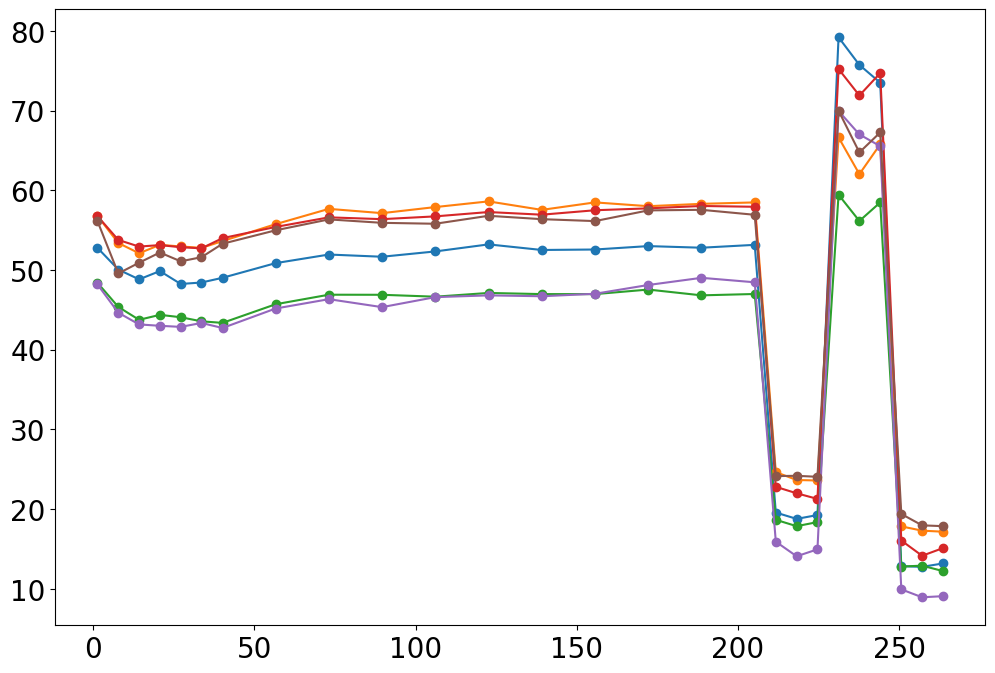

In [ ]:
matplotlib.pyplot.plot(timepoints, ocr[control_wells], 'o-')
matplotlib.pyplot.show()

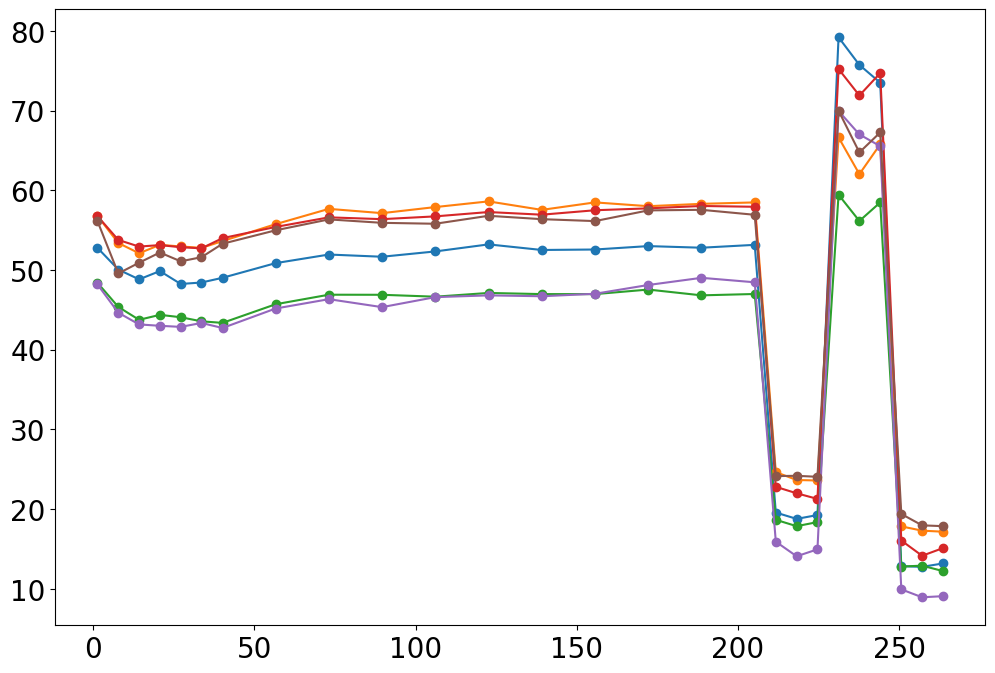

In [ ]:
matplotlib.pyplot.plot(timepoints, ocr[control_wells_representative], 'o-')
matplotlib.pyplot.show()

In [ ]:
relative_mu = ocr[control_wells_representative].mean()/ocr[control_wells_representative].mean().mean()
print(relative_mu)
normalized_black = ocr[control_wells_representative]/relative_mu

B02    1.009746
C02    1.073211
D02    0.885039
E02    1.080493
F02    0.888902
G02    1.062609
dtype: float64


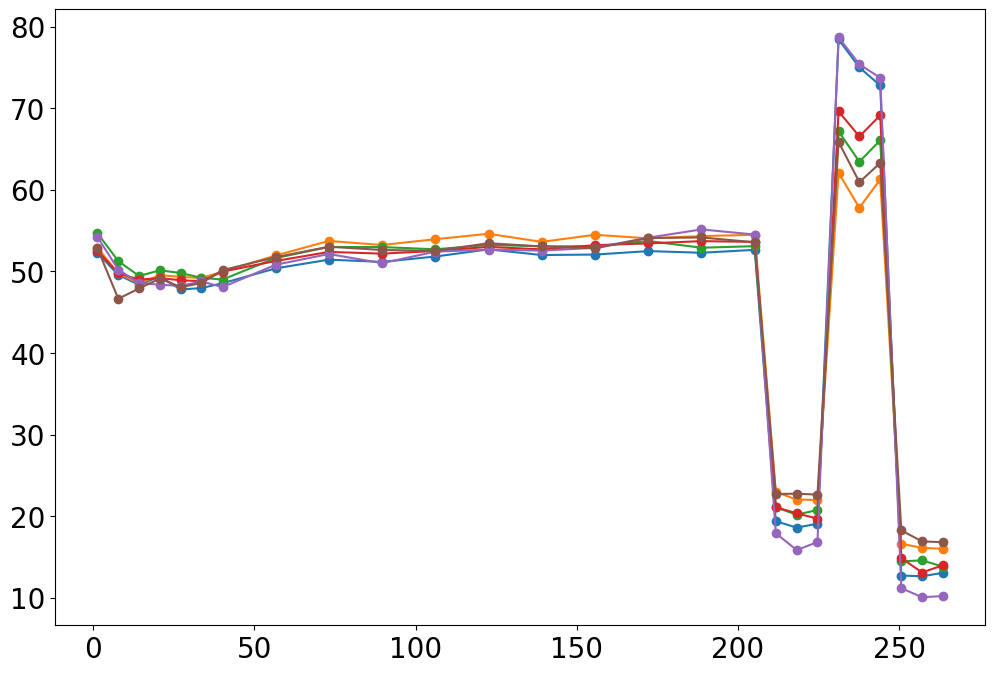

In [ ]:
matplotlib.pyplot.plot(timepoints, normalized_black, 'o-')
matplotlib.pyplot.show()

###**2.1.2. samples epi:nor 0.5 uM**

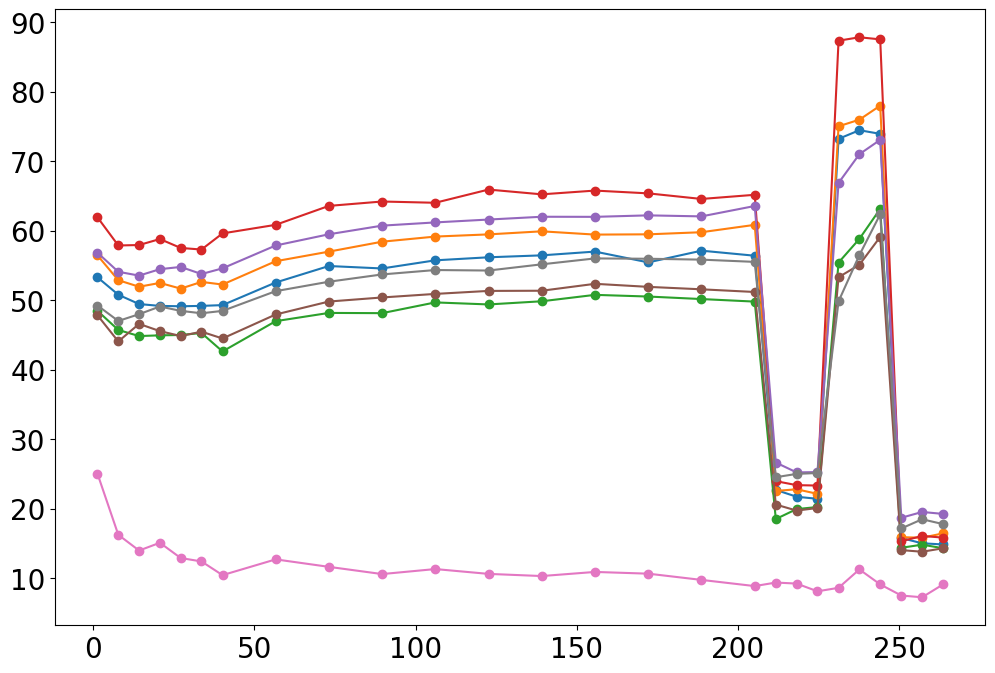

In [ ]:
matplotlib.pyplot.plot(timepoints, ocr[samples_epinor_half], 'o-')
matplotlib.pyplot.show()

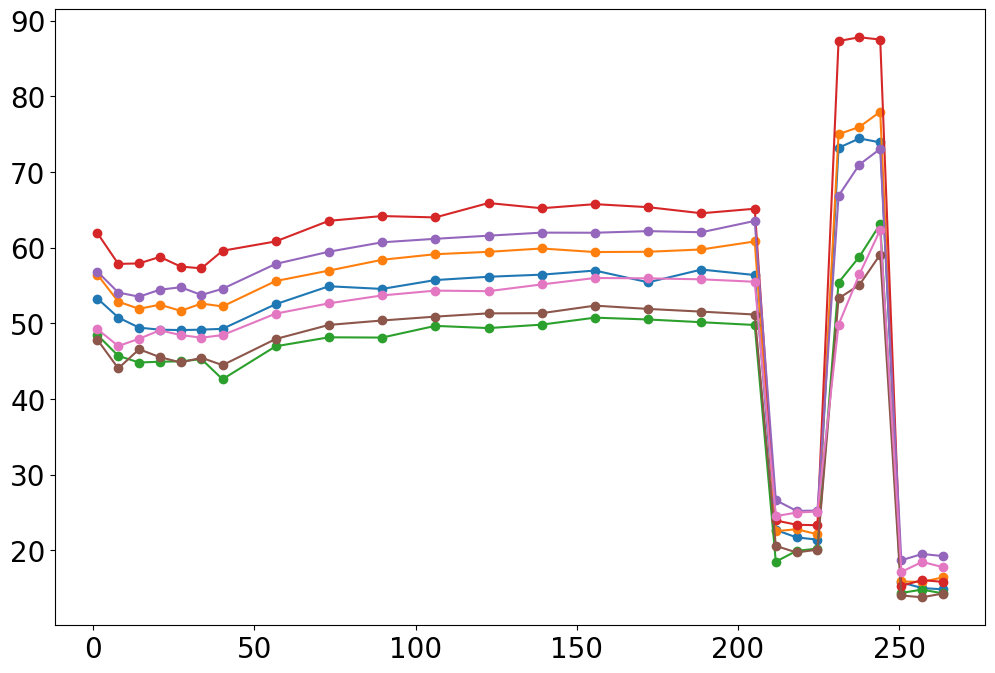

In [ ]:
matplotlib.pyplot.plot(timepoints, ocr[samples_epinor_half_representative], 'o-')
matplotlib.pyplot.show()

In [ ]:
relative_mu = ocr[samples_epinor_half_representative].mean()/ocr[samples_epinor_half_representative].mean().mean()
print(relative_mu)
normalized_green = ocr[samples_epinor_half_representative]/relative_mu

B03    0.998907
B04    1.050703
B05    0.878114
B06    1.157269
B07    1.079955
B08    0.884389
B10    0.950664
dtype: float64


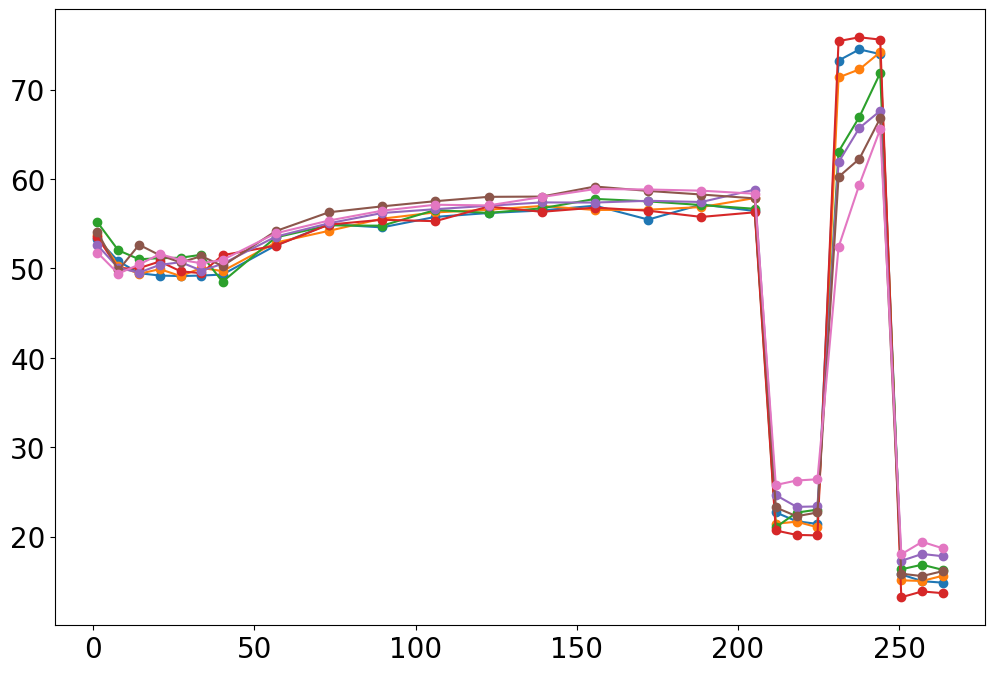

In [ ]:
matplotlib.pyplot.plot(timepoints, normalized_green, 'o-')
matplotlib.pyplot.show()



```
# This is formatted as code
```

###**2.1.3. samples epi:nor five**

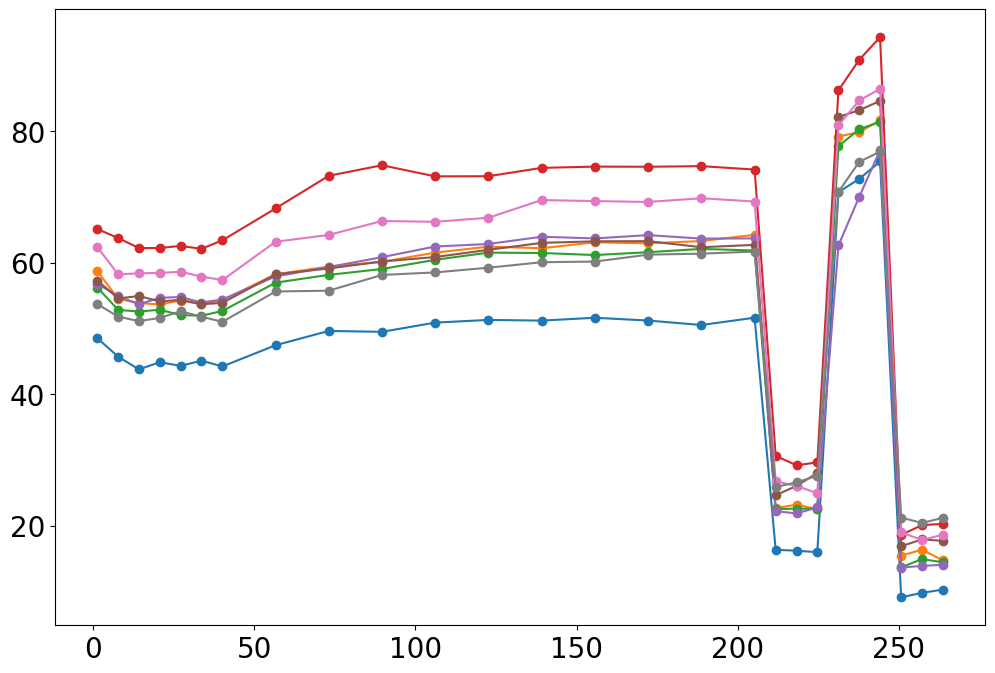

In [ ]:
matplotlib.pyplot.plot(timepoints, ocr[samples_epinor_five], 'o-')
matplotlib.pyplot.show()

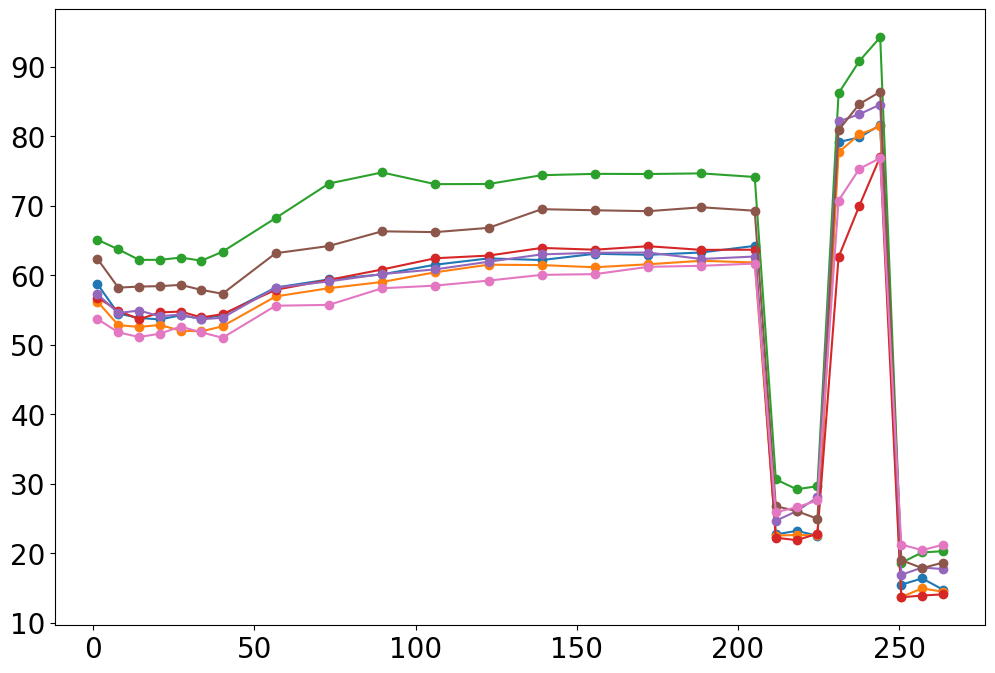

In [ ]:
matplotlib.pyplot.plot(timepoints, ocr[samples_epinor_five_representative], 'o-')
matplotlib.pyplot.show()

In [ ]:
relative_mu = ocr[samples_epinor_five_representative].mean()/ocr[samples_epinor_five_representative].mean().mean()
print(relative_mu)
normalized_orange = ocr[samples_epinor_five_representative]/relative_mu

C04    0.971420
C05    0.949491
C06    1.143299
C07    0.948334
C08    0.987694
C09    1.053300
C10    0.946463
dtype: float64


In [ ]:
ocr[samples_epinor_five_representative].mean().mean()

53.67751126326452

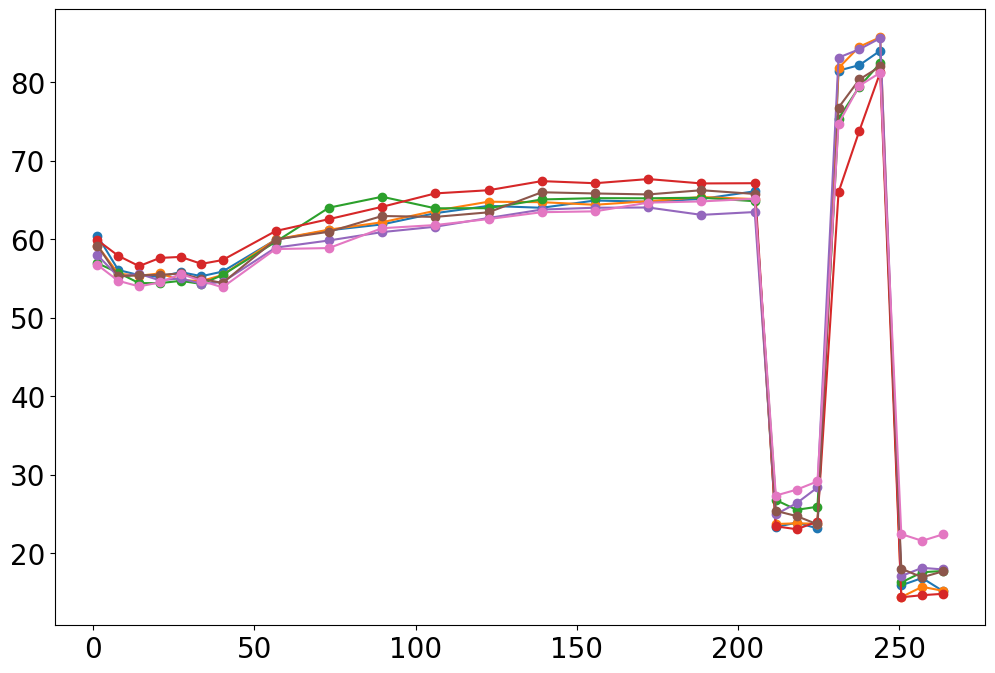

In [ ]:
matplotlib.pyplot.plot(timepoints, normalized_orange, 'o-')
matplotlib.pyplot.show()

###**2.1.4. build figure**

In [ ]:
#black = ocr[control_wells_representative]
#green = ocr[samples_4h_half_representative]
#orange = ocr[samples_4h_five_representative]

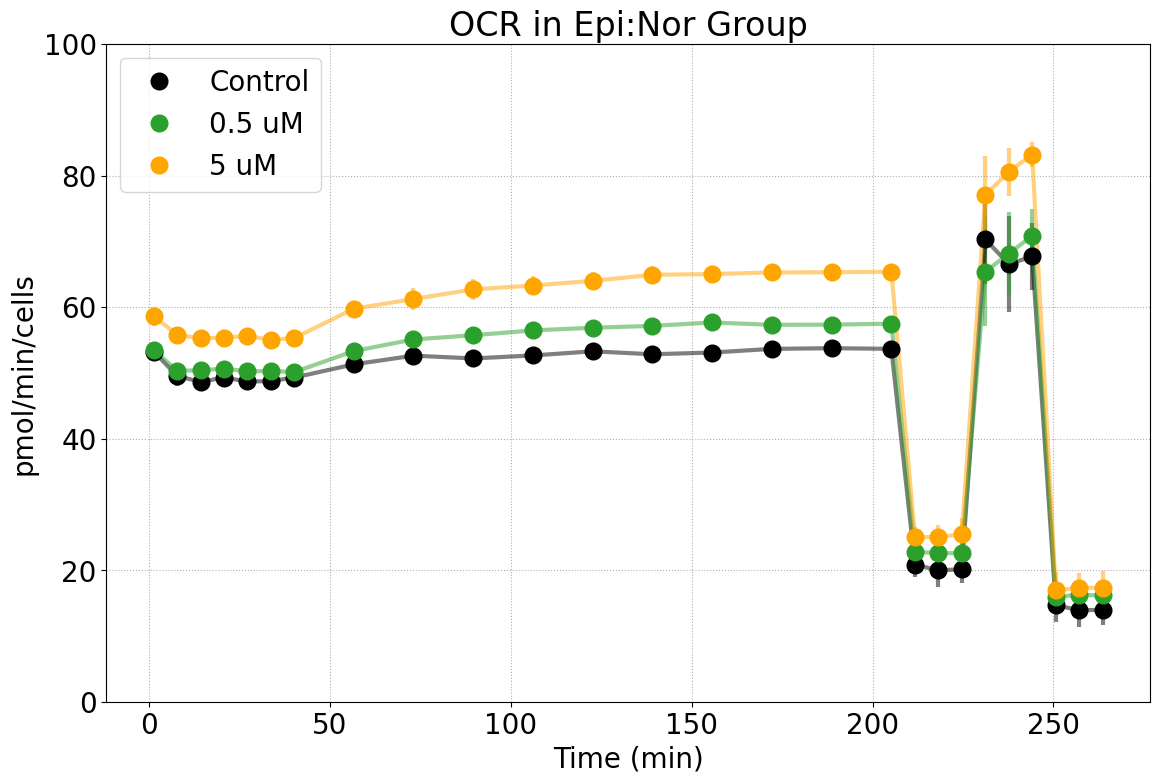

In [ ]:
mean = normalized_black.mean(axis=1)
std = normalized_black.std(axis=1)
#mean = black.mean(axis=1)
#std = black.std(axis=1)
matplotlib.pyplot.errorbar(timepoints, mean, std, lw=3, color='black', alpha=1/2)
matplotlib.pyplot.plot(timepoints, mean, 'o', color='black', ms=12, label='Control', zorder=999)

mean = normalized_green.mean(axis=1)
std = normalized_green.std(axis=1)
#mean = green.mean(axis=1)
#std = green.std(axis=1)
matplotlib.pyplot.errorbar(timepoints, mean, std, lw=3, color='#2CA02C', alpha=1/2)
matplotlib.pyplot.plot(timepoints, mean, 'o', color='#2CA02C', ms=12, label='0.5 uM', zorder=999)

mean = normalized_orange.mean(axis=1)
std = normalized_orange.std(axis=1)
#mean = orange.mean(axis=1)
#std = orange.std(axis=1)
matplotlib.pyplot.errorbar(timepoints, mean, std, lw=3, color='#FFA500', alpha=1/2)
matplotlib.pyplot.plot(timepoints, mean, 'o', color='#FFA500', ms=12, label='5 uM', zorder=999)

matplotlib.pyplot.grid(ls=':')

#matplotlib.pyplot.axvline(x=198, ls='--', lw=2, color='tab:blue', zorder=1)
#matplotlib.pyplot.axvline(x=236, ls='--', lw=2, color='tab:blue', zorder=1)
#matplotlib.pyplot.axvline(x=275, ls='--', lw=2, color='tab:blue', zorder=1)

#matplotlib.pyplot.text(200, 115, 'Oligomycin', color='tab:blue')
#matplotlib.pyplot.text(238, 115, 'FCCP', color='tab:blue')
#matplotlib.pyplot.text(276, 115, 'Rotenone', color='tab:blue')

matplotlib.pyplot.xlabel('Time (min)')
matplotlib.pyplot.ylabel('pmol/min/cells')
matplotlib.pyplot.legend(loc=2)
matplotlib.pyplot.ylim([0, 100])
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.title('OCR in Epi:Nor Group')

#matplotlib.pyplot.show()

matplotlib.pyplot.savefig('ocr.epinor.norm.png')

In [ ]:
normalized_black.iloc[5, :].to_list()
#normalized_black.iloc[9, :]

[47.960149107933404,
 49.172213287282766,
 49.21537852215069,
 48.78920073156699,
 48.770472416529685,
 48.562697050630554]

In [ ]:
normalized_black

B02        C02        D02        E02        F02        G02
0   52.265136  52.903843  54.677204  52.524669  54.201199  52.818059
1   49.570047  49.742958  51.257573  49.763258  50.220526  46.641209
2   48.350495  48.541184  49.430989  48.991031  48.563505  47.911593
3   49.382259  49.525295  50.133773  49.165235  48.371905  49.114961
4   47.778413  49.336491  49.797112  48.914937  48.218187  48.074604
5   47.960149  49.172213  49.215379  48.789201  48.770472  48.562697
6   48.545729  49.965443  48.996821  49.970226  48.061989  50.148770
7   50.369231  51.945278  51.637574  51.271875  50.811776  51.737126
8   51.435278  53.731009  52.988484  52.383756  52.127772  53.024011
9   51.160613  53.230677  52.977637  52.175506  51.003874  52.619207
10  51.820779  53.941698  52.707002  52.497586  52.416625  52.509738
11  52.695406  54.606285  53.237959  53.000611  52.664211  53.450737
12  52.001628  53.613235  53.074607  52.693226  52.540784  53.052096
13  52.059682  54.487745  53.071556  53.208995  52.890537  52.824089
14  52.483691  54.043851  53.718370  53.428791  54.129568  54.087427
15  52.282256  54.319486  52.898105  53.705076  55.141105  54.155649
16  52.638225  54.485886  53.090675  53.612005  54.510506  53.567730
17  19.382298  22.962900  21.085599  21.099533  17.907565  22.720487
18  18.594947  22.039221  20.180882  20.350157  15.845226  22.755229
19  19.070315  21.982645  20.758525  19.697258  16.823871  22.637355
20  78.425984  62.082854  67.160469  69.607940  78.689084  65.859612
21  74.991958  57.788788  63.437780  66.531611  75.377266  60.931666
22  72.784684  61.278632  66.067432  69.134606  73.724454  63.291517
23  12.719364  16.618346  14.457483  14.865518  11.175992  18.248416
24  12.635239  16.118814  14.584306  13.094340  10.058935  16.905518
25  13.057128  15.996151  13.817637  13.983984  10.213999  16.811429

In [ ]:
a = normalized_black.iloc[5, :].to_list()
b = normalized_green.iloc[5, :].to_list()
c = normalized_orange.iloc[5, :].to_list()
boxplot_basal.append(a); boxplot_basal.append(b); boxplot_basal.append(c)

a = normalized_black.iloc[13, :].to_list()
b =  normalized_green.iloc[13, :].to_list()
c = normalized_orange.iloc[13, :].to_list()
boxplot_maximal.append(a); boxplot_maximal.append(b); boxplot_maximal.append(c)

In [ ]:
a = normalized_black.iloc[5, :].to_list()
b = normalized_green.iloc[5, :].to_list()
c = normalized_orange.iloc[5, :].to_list()
d = normalized_black.iloc[13, :].to_list()
e = normalized_green.iloc[13, :].to_list()
f = normalized_orange.iloc[13, :].to_list()
boxplot_epinor.append(a); boxplot_epinor.append(b); boxplot_epinor.append(c); boxplot_epinor.append(d); boxplot_epinor.append(e); boxplot_epinor.append(f)

###**2.1.5. statistical differences**

In [ ]:
# statistical tests
for i in range(len(timepoints)):
    timepoint = timepoints[i]
    x = normalized_black.iloc[i, :].values
    y = normalized_green.iloc[i, :].values
    z = normalized_orange.iloc[i, :].values

    stata, pvaluea = scipy.stats.mannwhitneyu(x, y)
    statb, pvalueb = scipy.stats.mannwhitneyu(x, z)

    print(timepoint)
    if pvaluea < 0.05:
        print('half: significant', pvaluea)
    if pvalueb < 0.05:
        print('five: significant', pvalueb)

    print()

1.311086555
five: significant 0.0011655011655011655

7.76562958333333
five: significant 0.0011655011655011655

14.217591945
half: significant 0.002331002331002331
five: significant 0.0011655011655011655

20.67090454
half: significant 0.013986013986013986
five: significant 0.0011655011655011655

27.1232507016667
half: significant 0.022144522144522144
five: significant 0.0011655011655011655

33.573819495
half: significant 0.002331002331002331
five: significant 0.0011655011655011655

40.0990283316667
five: significant 0.0011655011655011655

56.590323295
half: significant 0.0011655011655011655
five: significant 0.0011655011655011655

73.0950356566667
half: significant 0.0011655011655011655
five: significant 0.0011655011655011655

89.5994791533333
half: significant 0.0011655011655011655
five: significant 0.0011655011655011655

106.106102411667
half: significant 0.0011655011655011655
five: significant 0.0011655011655011655

122.618719158333
half: significant 0.0011655011655011655
five: signi

##**2.2. work with Epi data**

In [ ]:
samples_epi_half = ['D03', 'D04', 'D05', 'D06', 'D07', 'D08', 'D09', 'D10']
samples_epi_five = ['E03', 'E04', 'E05', 'E06', 'E07', 'E08', 'E09', 'E10']

In [ ]:
samples_epi_half_representative = samples_epi_half
samples_epi_five_representative = samples_epi_five

###**2.2.1. half**

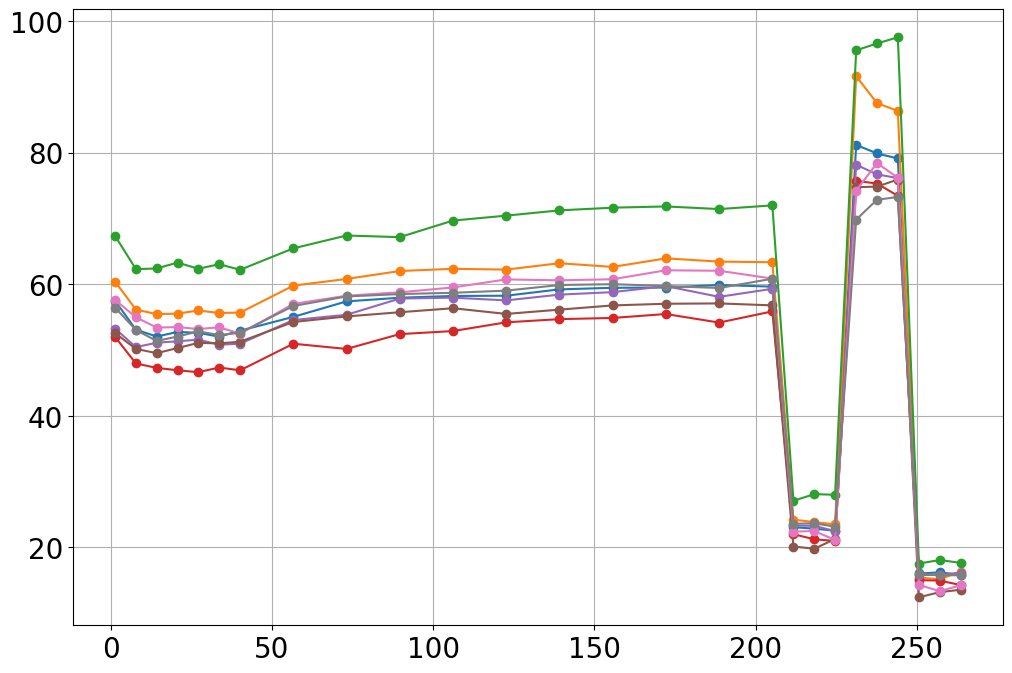

In [ ]:
matplotlib.pyplot.plot(timepoints, ocr[samples_epi_half], 'o-')
matplotlib.pyplot.grid()
matplotlib.pyplot.show()

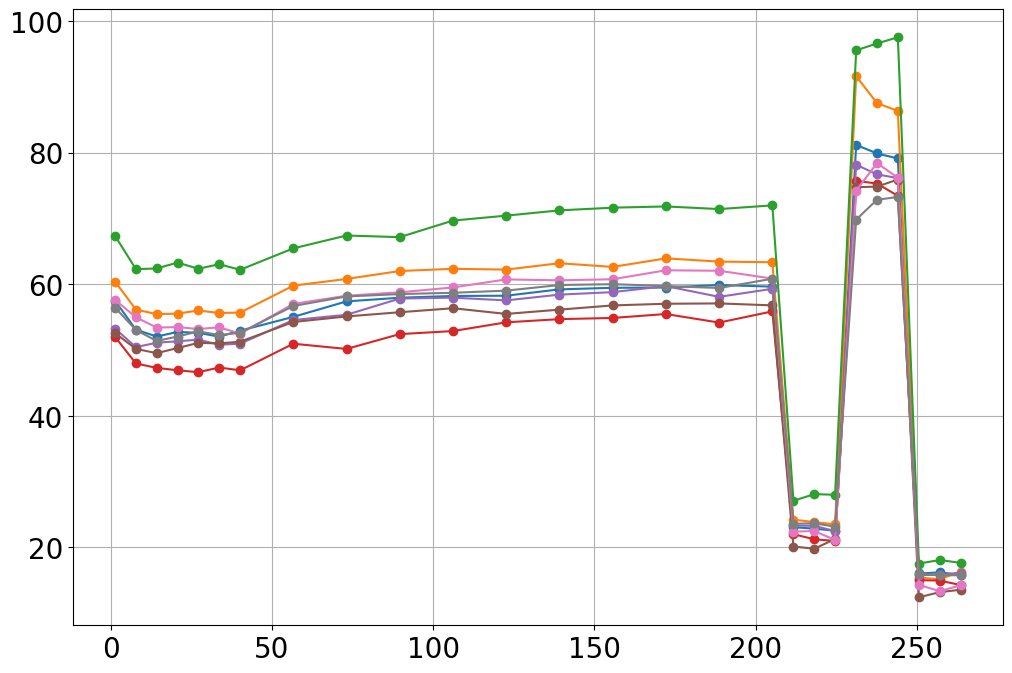

In [ ]:
matplotlib.pyplot.plot(timepoints, ocr[samples_epi_half_representative], 'o-')
matplotlib.pyplot.grid()
matplotlib.pyplot.show()

In [ ]:
relative_mu = ocr[samples_epi_half_representative].mean()/ocr[samples_epi_half_representative].mean().mean()
print(relative_mu)
normalized_green = ocr[samples_epi_half_representative]/relative_mu

D03    0.989363
D04    1.055840
D05    1.179798
D06    0.906203
D07    0.967326
D08    0.935471
D09    0.990747
D10    0.975250
dtype: float64


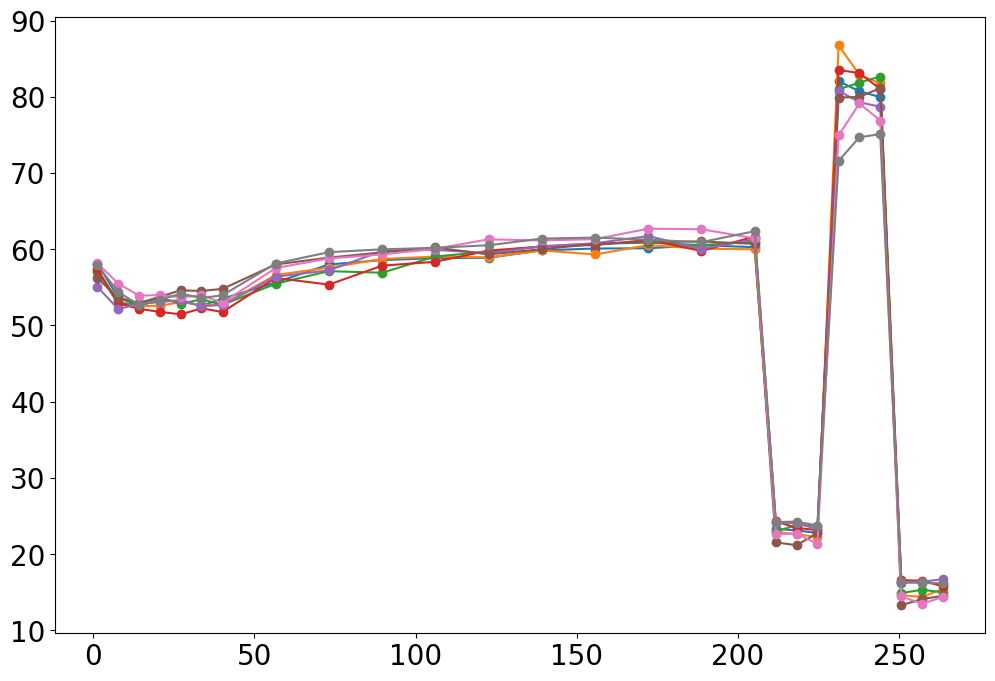

In [ ]:
matplotlib.pyplot.plot(timepoints, normalized_green, 'o-')
matplotlib.pyplot.show()

###**2.2.2. five**

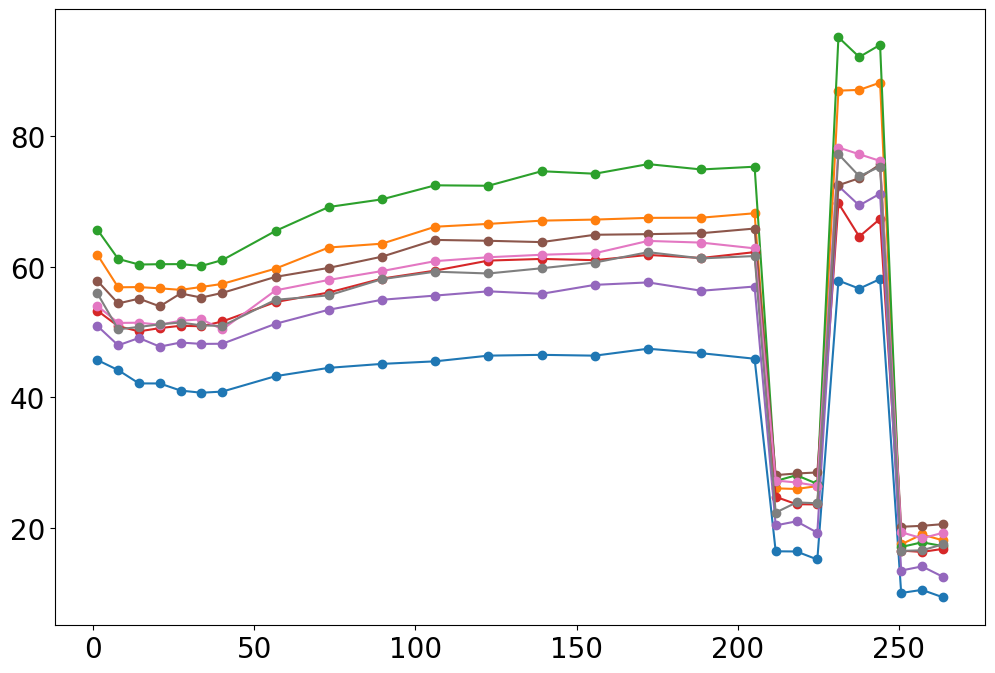

In [ ]:
matplotlib.pyplot.plot(timepoints, ocr[samples_epi_five], 'o-')
matplotlib.pyplot.show()

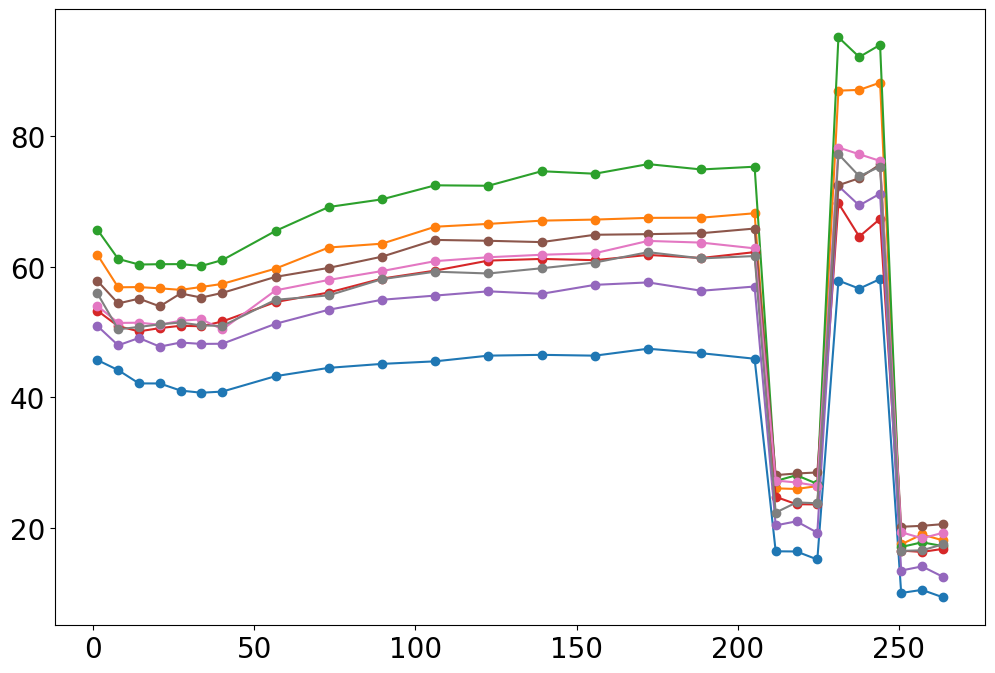

In [ ]:
matplotlib.pyplot.plot(timepoints, ocr[samples_epi_five_representative], 'o-')
matplotlib.pyplot.show()

In [ ]:
relative_mu = ocr[samples_epi_five_representative].mean()/ocr[samples_epi_five_representative].mean().mean()
print(relative_mu)
normalized_orange = ocr[samples_epi_five_representative]/relative_mu

E03    0.762315
E04    1.103158
E05    1.189983
E06    0.969550
E07    0.917422
E08    1.053191
E09    1.017606
E10    0.986775
dtype: float64


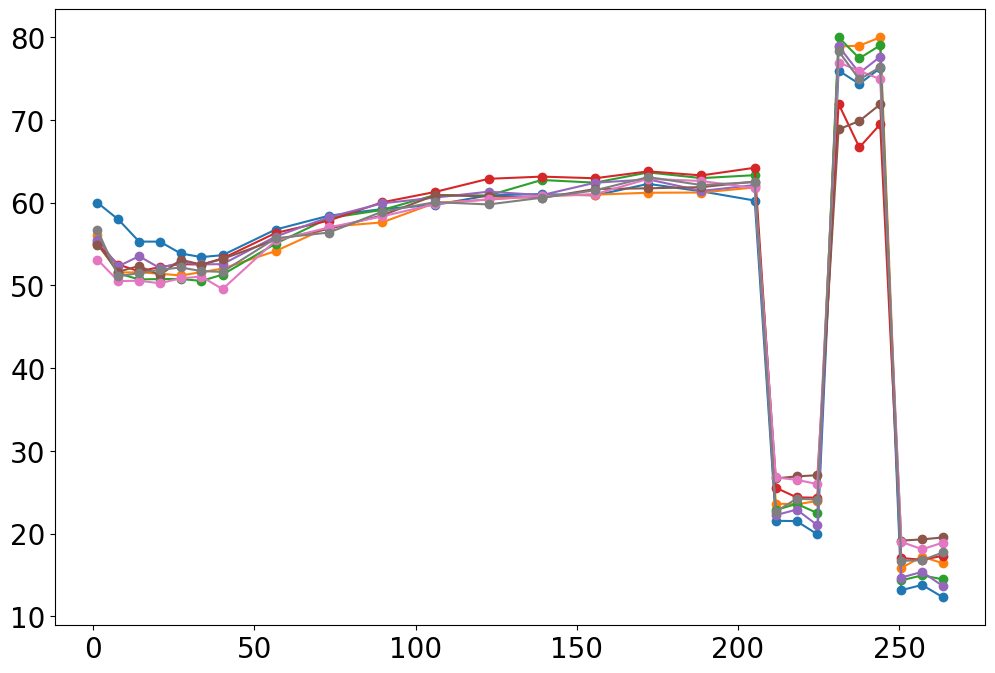

In [ ]:
matplotlib.pyplot.plot(timepoints, normalized_orange, 'o-')
matplotlib.pyplot.show()

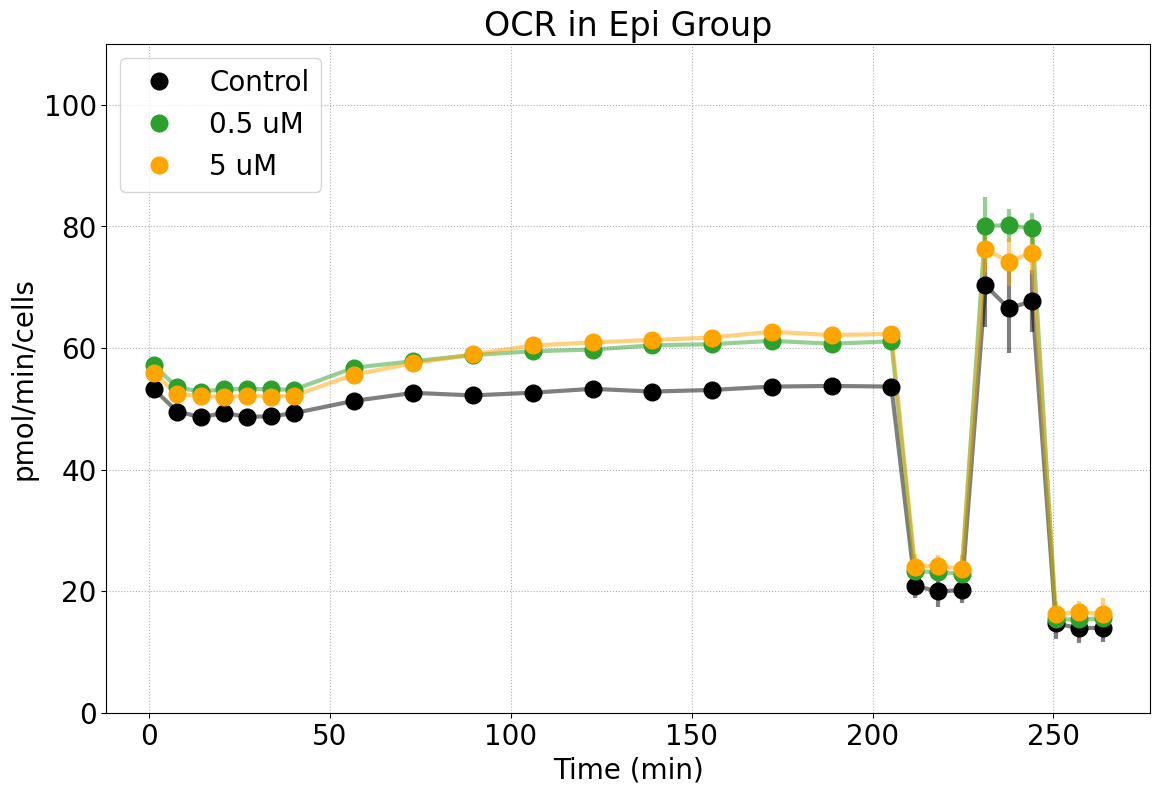

In [ ]:
mean = normalized_black.mean(axis=1)
std = normalized_black.std(axis=1)
#mean = black.mean(axis=1)
#std = black.std(axis=1)
matplotlib.pyplot.errorbar(timepoints, mean, std, lw=3, color='black', alpha=1/2)
matplotlib.pyplot.plot(timepoints, mean, 'o', color='black', ms=12, label='Control', zorder=999)

mean = normalized_green.mean(axis=1)
std = normalized_green.std(axis=1)
#mean = green.mean(axis=1)
#std = green.std(axis=1)
matplotlib.pyplot.errorbar(timepoints, mean, std, lw=3, color='#2CA02C', alpha=1/2)
matplotlib.pyplot.plot(timepoints, mean, 'o', color='#2CA02C', ms=12, label='0.5 uM', zorder=999)

mean = normalized_orange.mean(axis=1)
std = normalized_orange.std(axis=1)
#mean = orange.mean(axis=1)
#std = orange.std(axis=1)
matplotlib.pyplot.errorbar(timepoints, mean, std, lw=3, color='#FFA500', alpha=1/2)
matplotlib.pyplot.plot(timepoints, mean, 'o', color='#FFA500', ms=12, label='5 uM', zorder=999)

matplotlib.pyplot.grid(ls=':')

#matplotlib.pyplot.axvline(x=198, ls='--', lw=2, color='tab:blue', zorder=1)
#matplotlib.pyplot.axvline(x=236, ls='--', lw=2, color='tab:blue', zorder=1)
#matplotlib.pyplot.axvline(x=275, ls='--', lw=2, color='tab:blue', zorder=1)

#matplotlib.pyplot.text(200, 115, 'Oligomycin', color='tab:blue')
#matplotlib.pyplot.text(238, 115, 'FCCP', color='tab:blue')
#matplotlib.pyplot.text(276, 115, 'Rotenone', color='tab:blue')

matplotlib.pyplot.xlabel('Time (min)')
matplotlib.pyplot.ylabel('pmol/min/cells')
matplotlib.pyplot.legend(loc=2)
matplotlib.pyplot.ylim([0, 110])
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.title('OCR in Epi Group')

#matplotlib.pyplot.show()

matplotlib.pyplot.savefig('ocr.epi.norm.png')

In [ ]:
b = normalized_green.iloc[5, :].to_list()
c = normalized_orange.iloc[5, :].to_list()
boxplot_basal.append(b); boxplot_basal.append(c)

b = normalized_green.iloc[13, :].to_list()
c = normalized_orange.iloc[13, :].to_list()
boxplot_maximal.append(b); boxplot_maximal.append(c)

In [ ]:
a = normalized_black.iloc[5, :].to_list()
b = normalized_green.iloc[5, :].to_list()
c = normalized_orange.iloc[5, :].to_list()
d = normalized_black.iloc[13, :].to_list()
e = normalized_green.iloc[13, :].to_list()
f = normalized_orange.iloc[13, :].to_list()
boxplot_epi.append(a); boxplot_epi.append(b); boxplot_epi.append(c); boxplot_epi.append(d); boxplot_epi.append(e); boxplot_epi.append(f)

In [ ]:
#atp_drop = numpy.mean(normalized_orange.iloc[6, :] - normalized_orange.iloc[5, :])
#rel = 100*(-atp_drop / numpy.mean(normalized_orange.iloc[5, :]))

#print(atp_drop, rel)

#atp_drop = numpy.mean(normalized_green.iloc[6, :] - normalized_green.iloc[5, :])
#rel = 100*(-atp_drop / numpy.mean(normalized_green.iloc[5, :]))

#print(atp_drop, rel)

#atp_drop = numpy.mean(normalized_black.iloc[6, :] - normalized_black.iloc[5, :])
#rel = 100*(-atp_drop / numpy.mean(normalized_black.iloc[5, :]))

#print(atp_drop, rel)

In [ ]:
# statistical tests
for i in range(len(timepoints)):
    timepoint = timepoints[i]
    x = normalized_black.iloc[i, :].values
    y = normalized_green.iloc[i, :].values
    z = normalized_orange.iloc[i, :].values

    stata, pvaluea = scipy.stats.mannwhitneyu(x, y)
    statb, pvalueb = scipy.stats.mannwhitneyu(x, z)

    print(timepoint)
    if pvaluea < 0.05:
        print('half: significant', pvaluea)
    if pvalueb < 0.05:
        print('five: significant', pvalueb)

    print()

1.311086555
half: significant 0.000666000666000666
five: significant 0.002664002664002664

7.76562958333333
half: significant 0.000666000666000666
five: significant 0.002664002664002664

14.217591945
half: significant 0.000666000666000666
five: significant 0.000666000666000666

20.67090454
half: significant 0.000666000666000666
five: significant 0.000666000666000666

27.1232507016667
half: significant 0.000666000666000666
five: significant 0.000666000666000666

33.573819495
half: significant 0.000666000666000666
five: significant 0.000666000666000666

40.0990283316667
half: significant 0.000666000666000666
five: significant 0.004662004662004662

56.590323295
half: significant 0.000666000666000666
five: significant 0.000666000666000666

73.0950356566667
half: significant 0.000666000666000666
five: significant 0.000666000666000666

89.5994791533333
half: significant 0.000666000666000666
five: significant 0.000666000666000666

106.106102411667
half: significant 0.000666000666000666
five: 

##**2.3. Work with Nor data**

In [ ]:
samples_nor_half = ['F03', 'F04', 'F05', 'F06', 'F07', 'F08', 'F09', 'F10']
samples_nor_five = ['G03', 'G04', 'G05', 'G06', 'G07', 'G08', 'G09', 'G10']

In [ ]:
samples_nor_half_representative = ['F04', 'F05', 'F06', 'F07', 'F08', 'F09', 'F10']
samples_nor_five_representative = ['G03', 'G04', 'G05', 'G07', 'G08', 'G10']

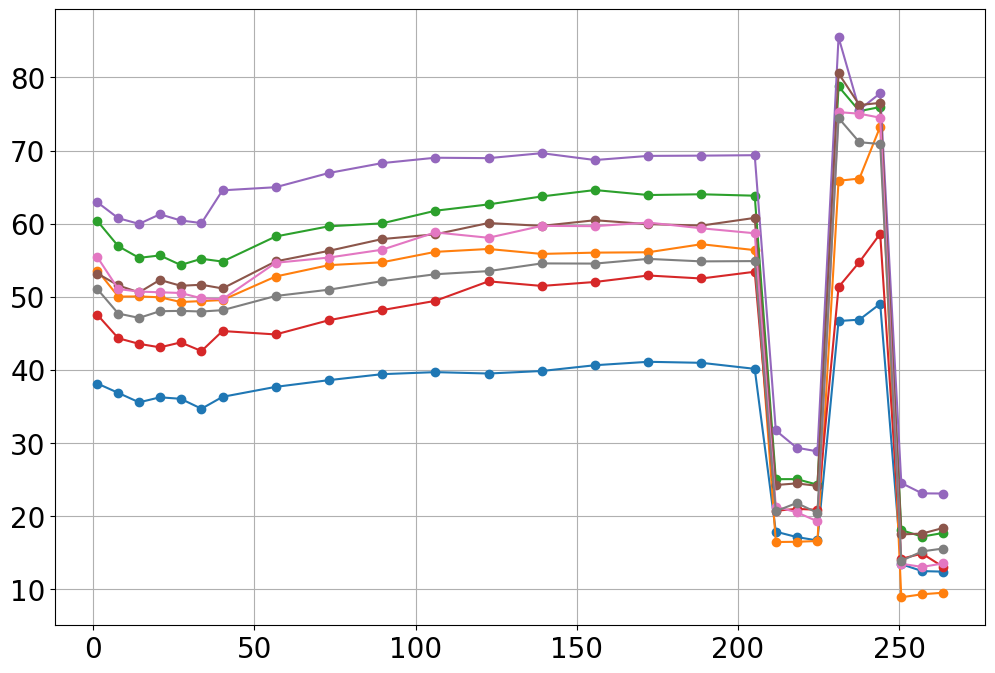

In [ ]:
matplotlib.pyplot.plot(timepoints, ocr[samples_nor_half], 'o-')
matplotlib.pyplot.grid()
matplotlib.pyplot.show()

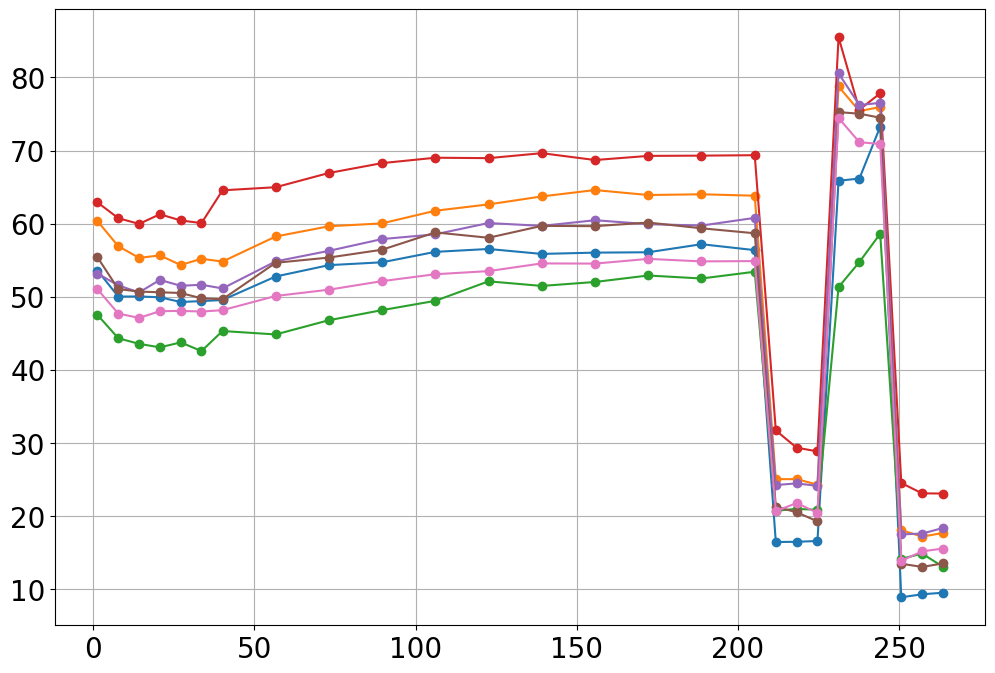

In [ ]:
matplotlib.pyplot.plot(timepoints, ocr[samples_nor_half_representative], 'o-')
matplotlib.pyplot.grid()
matplotlib.pyplot.show()

In [ ]:
relative_mu = ocr[samples_nor_half_representative].mean()/ocr[samples_nor_half_representative].mean().mean()
print(relative_mu)
normalized_green = ocr[samples_nor_half_representative]/relative_mu

F04    0.933051
F05    1.075872
F06    0.848931
F07    1.186894
F08    1.026716
F09    0.991198
F10    0.937339
dtype: float64


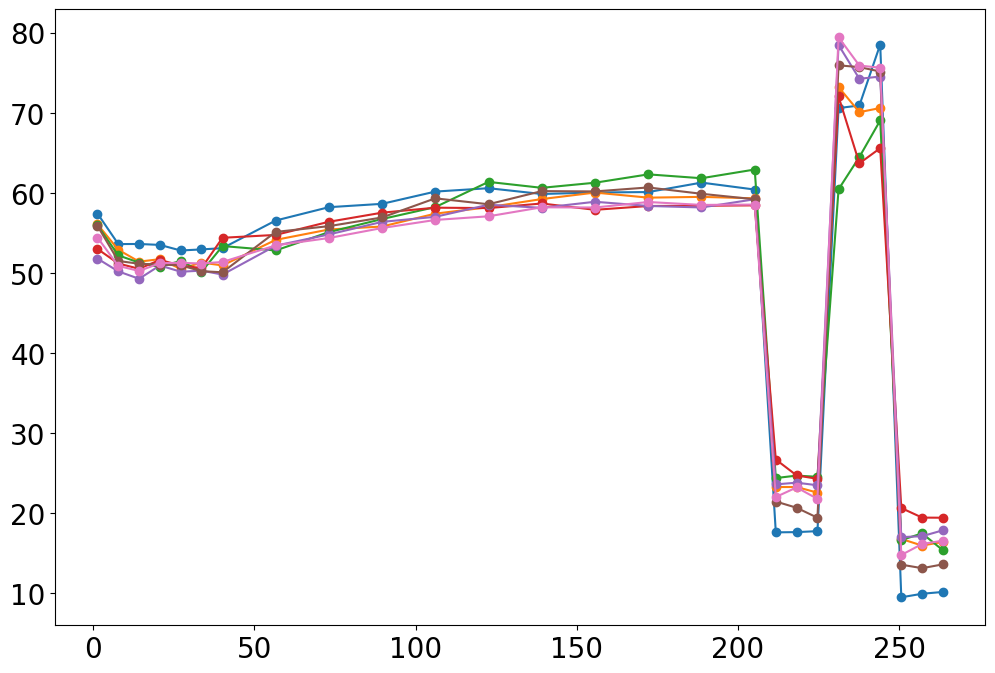

In [ ]:
matplotlib.pyplot.plot(timepoints, normalized_green, 'o-')
matplotlib.pyplot.show()

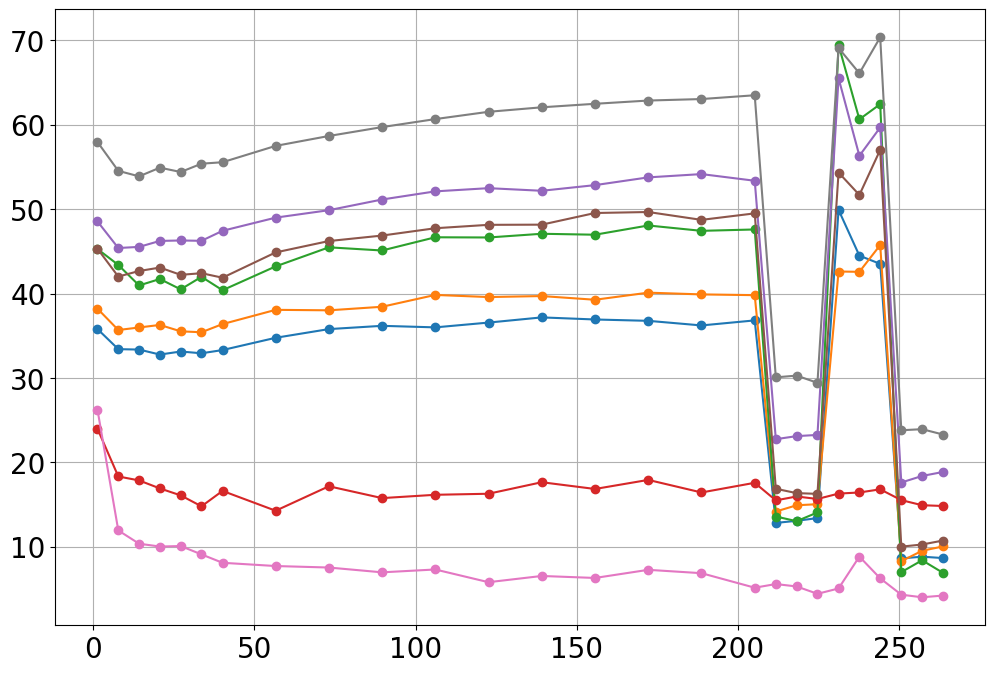

In [ ]:
matplotlib.pyplot.plot(timepoints, ocr[samples_nor_five], 'o-')
matplotlib.pyplot.grid()
matplotlib.pyplot.show()

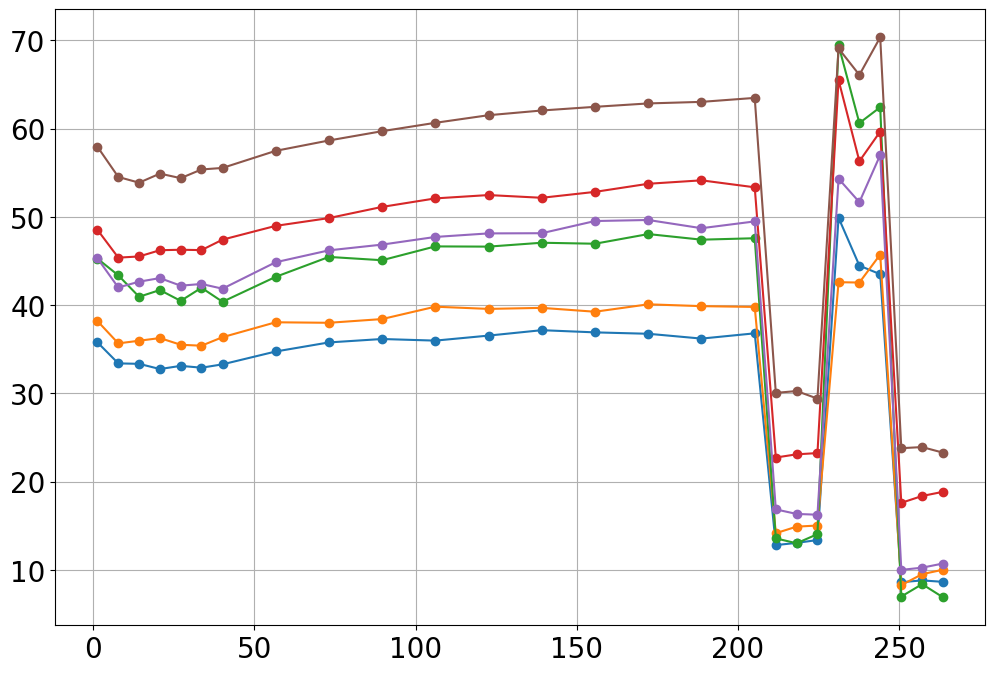

In [ ]:
matplotlib.pyplot.plot(timepoints, ocr[samples_nor_five_representative], 'o-')
matplotlib.pyplot.grid()
matplotlib.pyplot.show()

In [ ]:
relative_mu = ocr[samples_nor_five_representative].mean()/ocr[samples_nor_five_representative].mean().mean()
print(relative_mu)
normalized_orange = ocr[samples_nor_five_representative]/relative_mu

G03    0.774843
G04    0.821167
G05    0.980651
G07    1.114200
G08    0.988948
G10    1.320190
dtype: float64


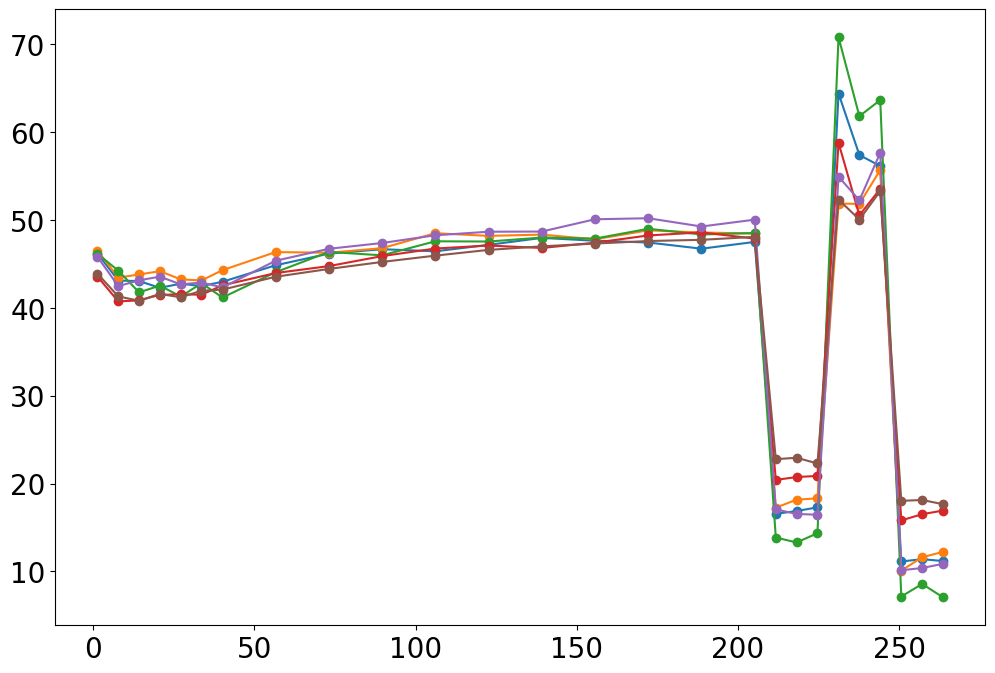

In [ ]:
matplotlib.pyplot.plot(timepoints, normalized_orange, 'o-')
matplotlib.pyplot.show()

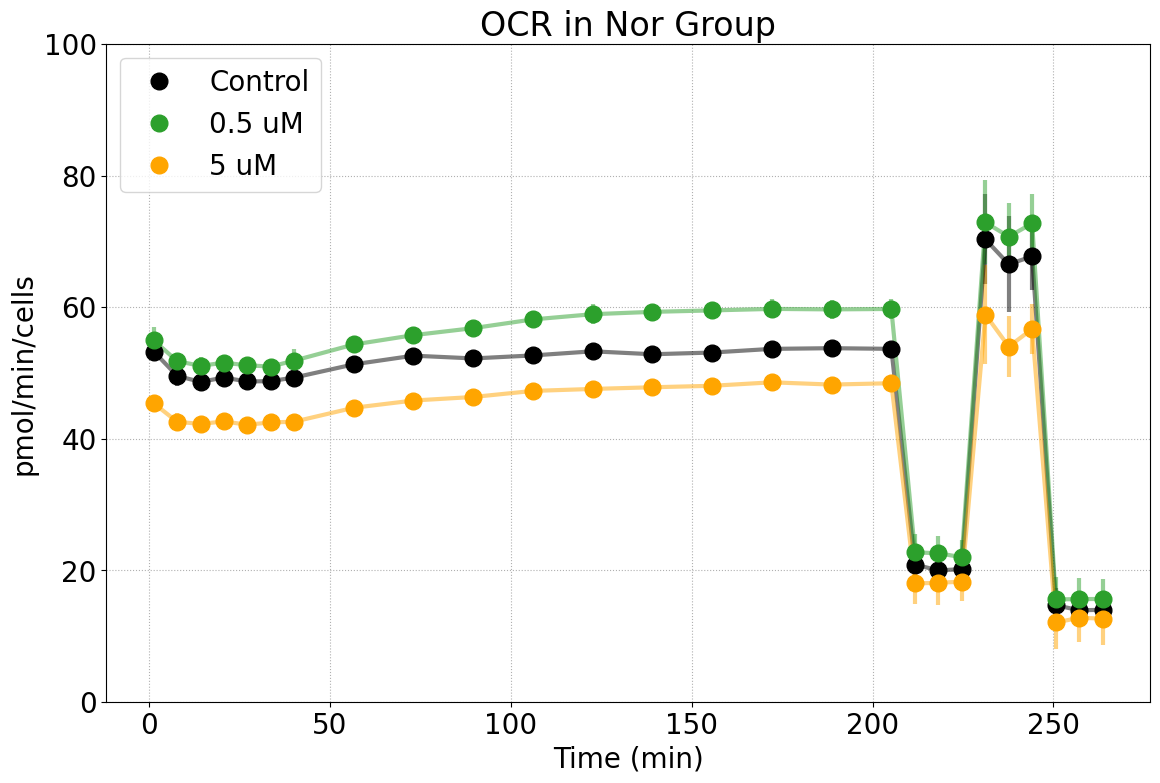

In [ ]:
mean = normalized_black.mean(axis=1)
std = normalized_black.std(axis=1)
#mean = black.mean(axis=1)
#std = black.std(axis=1)
matplotlib.pyplot.errorbar(timepoints, mean, std, lw=3, color='black', alpha=1/2)
matplotlib.pyplot.plot(timepoints, mean, 'o', color='black', ms=12, label='Control', zorder=999)

mean = normalized_green.mean(axis=1)
std = normalized_green.std(axis=1)
#mean = green.mean(axis=1)
#std = green.std(axis=1)
matplotlib.pyplot.errorbar(timepoints, mean, std, lw=3, color='#2CA02C', alpha=1/2)
matplotlib.pyplot.plot(timepoints, mean, 'o', color='#2CA02C', ms=12, label='0.5 uM', zorder=999)

mean = normalized_orange.mean(axis=1)
std = normalized_orange.std(axis=1)
#mean = orange.mean(axis=1)
#std = orange.std(axis=1)
matplotlib.pyplot.errorbar(timepoints, mean, std, lw=3, color='#FFA500', alpha=1/2)
matplotlib.pyplot.plot(timepoints, mean, 'o', color='#FFA500', ms=12, label='5 uM', zorder=999)

matplotlib.pyplot.grid(ls=':')

#matplotlib.pyplot.axvline(x=198, ls='--', lw=2, color='tab:blue', zorder=1)
#matplotlib.pyplot.axvline(x=236, ls='--', lw=2, color='tab:blue', zorder=1)
#matplotlib.pyplot.axvline(x=275, ls='--', lw=2, color='tab:blue', zorder=1)

#matplotlib.pyplot.text(200, 115, 'Oligomycin', color='tab:blue')
#matplotlib.pyplot.text(238, 115, 'FCCP', color='tab:blue')
#matplotlib.pyplot.text(276, 115, 'Rotenone', color='tab:blue')

matplotlib.pyplot.xlabel('Time (min)')
matplotlib.pyplot.ylabel('pmol/min/cells')
matplotlib.pyplot.legend(loc=2)
matplotlib.pyplot.ylim([0, 100])
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.title('OCR in Nor Group')

#matplotlib.pyplot.show()

matplotlib.pyplot.savefig('ocr.nor.norm.png')

In [ ]:
b = normalized_green.iloc[5, :].to_list()
c = normalized_orange.iloc[5, :].to_list()
boxplot_basal.append(b); boxplot_basal.append(c)

b = normalized_green.iloc[13, :].to_list()
c = normalized_orange.iloc[13, :].to_list()
boxplot_maximal.append(b); boxplot_maximal.append(c)

In [ ]:
a = normalized_black.iloc[5, :].to_list()
b = normalized_green.iloc[5, :].to_list()
c = normalized_orange.iloc[5, :].to_list()
d = normalized_black.iloc[13, :].to_list()
e = normalized_green.iloc[13, :].to_list()
f = normalized_orange.iloc[13, :].to_list()
boxplot_nor.append(a); boxplot_nor.append(b); boxplot_nor.append(c); boxplot_nor.append(d); boxplot_nor.append(e); boxplot_nor.append(f)

##**2.4. boxplots**

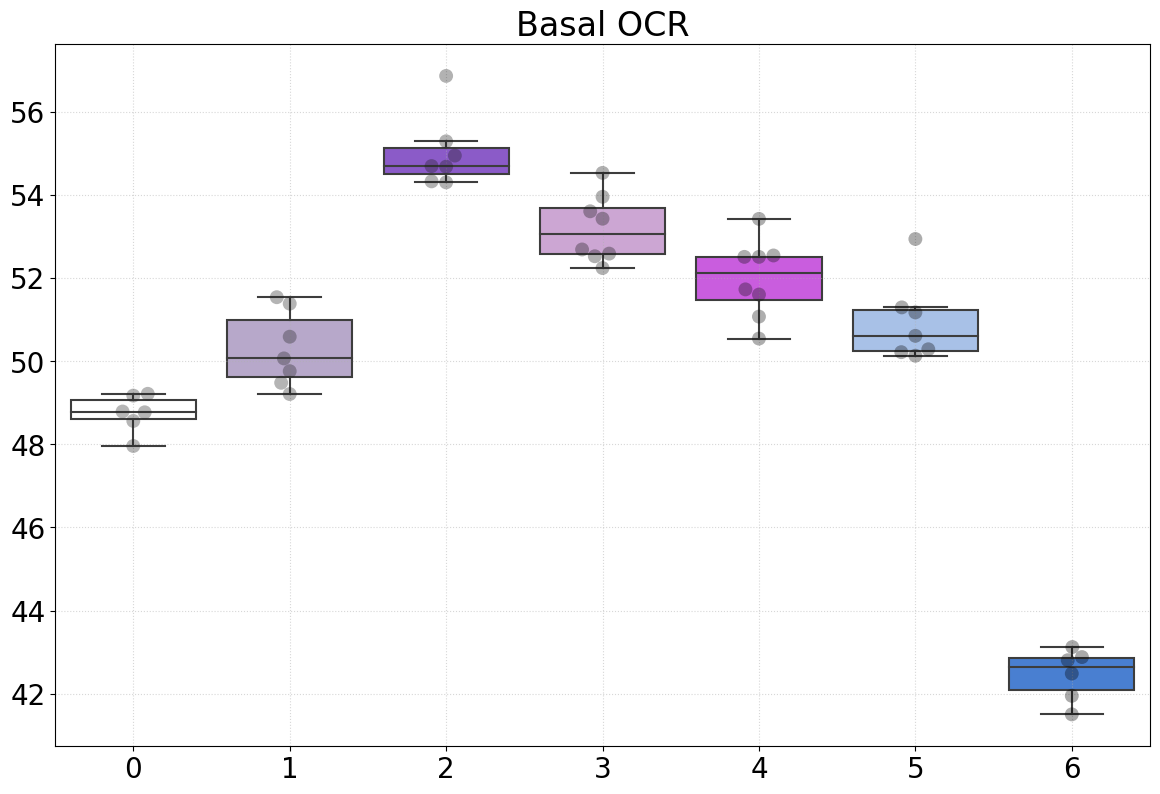

In [ ]:
# Create a boxplot
canvas = seaborn.boxplot(data=boxplot_basal, showfliers=False)

# Define the colors for the boxes
colors = ['white', '#B7A8CA', '#8B5BC8', '#CCA6D3', '#C95DDE', '#A8C1E7', '#497FD1']

# Set the colors for each box
for i, box in enumerate(canvas.patches):
    box.set_facecolor(colors[i])

# Add a swarmplot on top of the boxplot
seaborn.swarmplot(data=boxplot_basal, palette='dark:black', alpha=1/3, size=10)

# Add grid and adjust layout
matplotlib.pyplot.grid(ls=':', alpha=0.5)
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.title('Basal OCR')
#matplotlib.pyplot.show()

matplotlib.pyplot.savefig('ocr.basal.allgroups.norm.png')

In [ ]:
#canvas = seaborn.boxplot(data=boxplot_basal, showfliers=False)
#canvas.artists[0].set_facecolor('white')
#canvas.artists[1].set_facecolor('#2CA02C')
#canvas.artists[2].set_facecolor('#FFA500')
#canvas.artists[3].set_facecolor('#2CA02C')
#canvas.artists[4].set_facecolor('#FFA500')

#seaborn.swarmplot(data=boxplot_basal, color='black', alpha=1/3, size=10)

#matplotlib.pyplot.grid(ls=':', alpha=0.5)
#matplotlib.pyplot.tight_layout()

#matplotlib.pyplot.savefig('ocr.basal.jpg')

In [ ]:
for i in range(len(boxplot_basal)):
    stat, pvalue = scipy.stats.mannwhitneyu(boxplot_basal[0], boxplot_basal[i])
    print(stat, pvalue)

    a = numpy.mean(boxplot_basal[0])
    b = numpy.mean(boxplot_basal[i])
    fc = b / a
    print('\t', a, b, fc)

18.0 1.0
	 48.745018519349024 48.745018519349024 1.0
1.0 0.002331002331002331
	 48.745018519349024 50.28990940379912 1.0316933079805244
0.0 0.0011655011655011655
	 48.745018519349024 55.01391959803593 1.128605984141713
0.0 0.000666000666000666
	 48.745018519349024 53.19448143357617 1.0912803615504005
0.0 0.000666000666000666
	 48.745018519349024 51.99141129964381 1.0665994778318968
0.0 0.0011655011655011655
	 48.745018519349024 50.950255867544556 1.045240260752392
36.0 0.0021645021645021645
	 48.745018519349024 42.45939303561471 0.8710509160799831


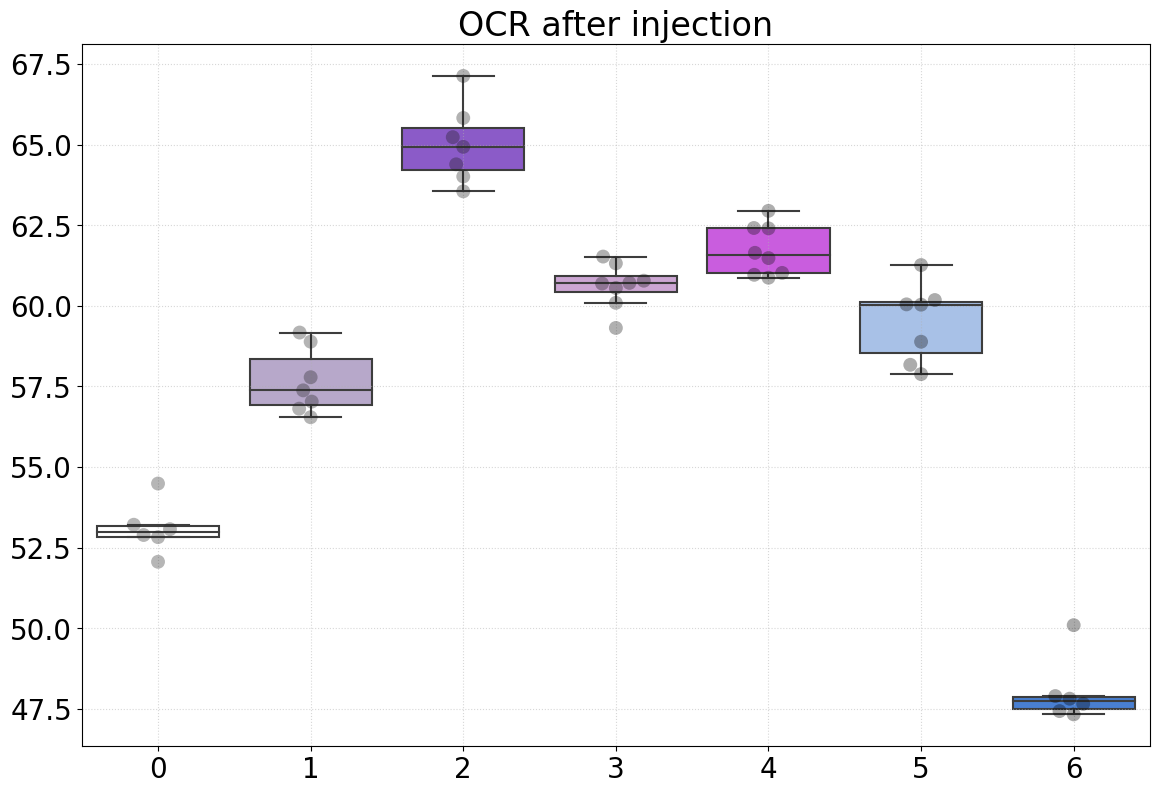

In [ ]:
# Create a boxplot
canvas = seaborn.boxplot(data=boxplot_maximal, showfliers=False)

# Define the colors for the boxes
colors = ['white', '#B7A8CA', '#8B5BC8', '#CCA6D3', '#C95DDE', '#A8C1E7', '#497FD1']

# Set the colors for each box
for i, box in enumerate(canvas.patches):
    box.set_facecolor(colors[i])

# Add a swarmplot on top of the boxplot
seaborn.swarmplot(data=boxplot_maximal, palette='dark:black', alpha=1/3, size=10)

# Add grid and adjust layout
matplotlib.pyplot.grid(ls=':', alpha=0.5)
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.title('OCR after injection')
#matplotlib.pyplot.show()

matplotlib.pyplot.savefig('ocr.injection.allgroups.norm.png')

In [ ]:
#canvas = seaborn.boxplot(data=boxplot_maximal, showfliers=False)
#canvas.artists[0].set_facecolor('#f5f5f5')
#canvas.artists[1].set_facecolor('#2CA02C')
#canvas.artists[2].set_facecolor('#FFA500')
#canvas.artists[3].set_facecolor('#2CA02C')
#canvas.artists[4].set_facecolor('#FFA500')

#seaborn.swarmplot(data=boxplot_maximal, color='black', alpha=1/3, size=10)
#seaborn.swarmplot(data=boxplot_maximal, palette='dark:black', alpha=1/3, size=10)
#matplotlib.pyplot.grid(ls=':', alpha=0.5)
#matplotlib.pyplot.tight_layout()

#matplotlib.pyplot.savefig('ocr.maximal.svg')

In [ ]:
for i in range(len(boxplot_maximal)):
    stat, pvalue = scipy.stats.mannwhitneyu(boxplot_maximal[0], boxplot_maximal[i])
    print(stat, pvalue)

    a = numpy.mean(boxplot_maximal[0])
    b = numpy.mean(boxplot_maximal[i])
    fc = b / a
    print('\t', a, b, fc)

18.0 1.0
	 53.09043392470346 53.09043392470346 1.0
0.0 0.0011655011655011655
	 53.09043392470346 57.65897717138315 1.0860520984469464
0.0 0.0011655011655011655
	 53.09043392470346 65.0134589140664 1.2245795354822868
0.0 0.000666000666000666
	 53.09043392470346 60.625284684343356 1.141924829062922
0.0 0.000666000666000666
	 53.09043392470346 61.71991862612458 1.1625431186654087
0.0 0.0011655011655011655
	 53.09043392470346 59.49624837565509 1.1206585438732108
36.0 0.0021645021645021645
	 53.09043392470346 48.0342748288031 0.9047632742450107


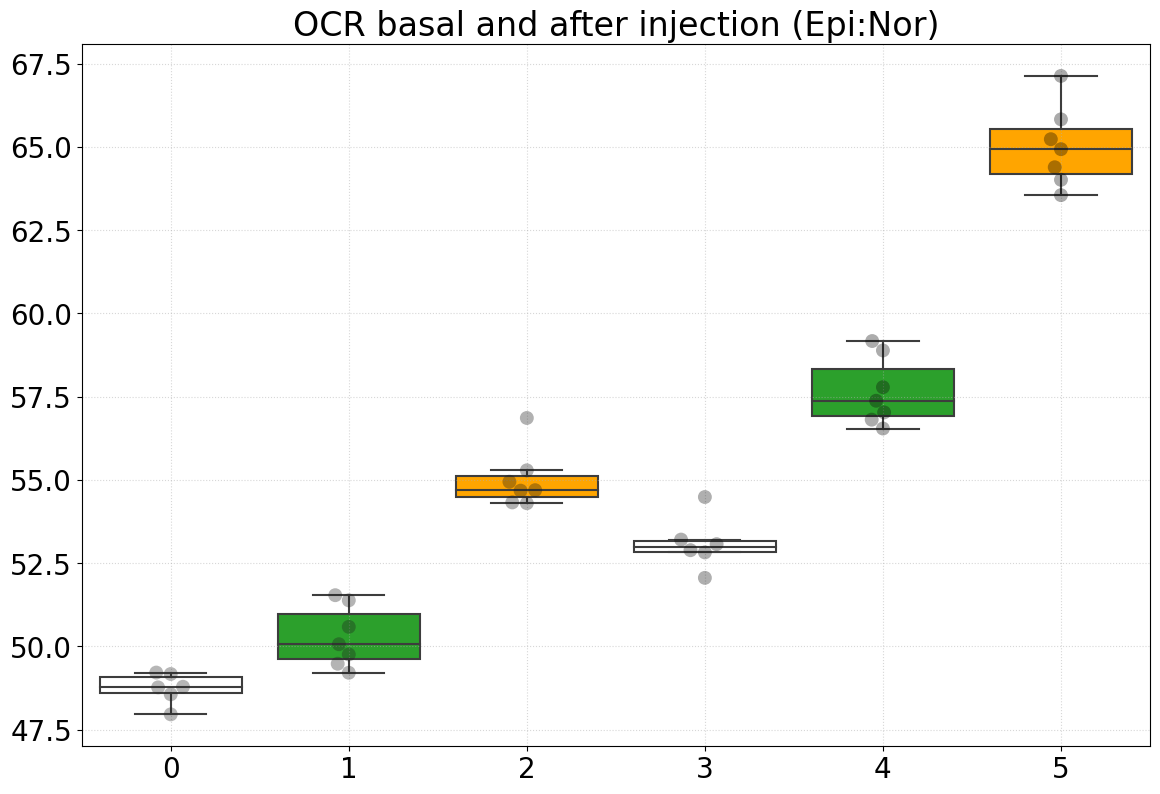

In [ ]:
# Create a boxplot
canvas = seaborn.boxplot(data=boxplot_epinor, showfliers=False)

# Define the colors for the boxes
colors = ['white', '#2CA02C', '#FFA500', 'white', '#2CA02C', '#FFA500']

# Set the colors for each box
for i, box in enumerate(canvas.patches):
    box.set_facecolor(colors[i])

# Add a swarmplot on top of the boxplot
seaborn.swarmplot(data=boxplot_epinor, palette='dark:black', alpha=1/3, size=10)

# Add grid and adjust layout
matplotlib.pyplot.grid(ls=':', alpha=0.5)
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.title('OCR basal and after injection (Epi:Nor)')
#matplotlib.pyplot.show()

matplotlib.pyplot.savefig('ocr.epinor.boxplot.norm.png')

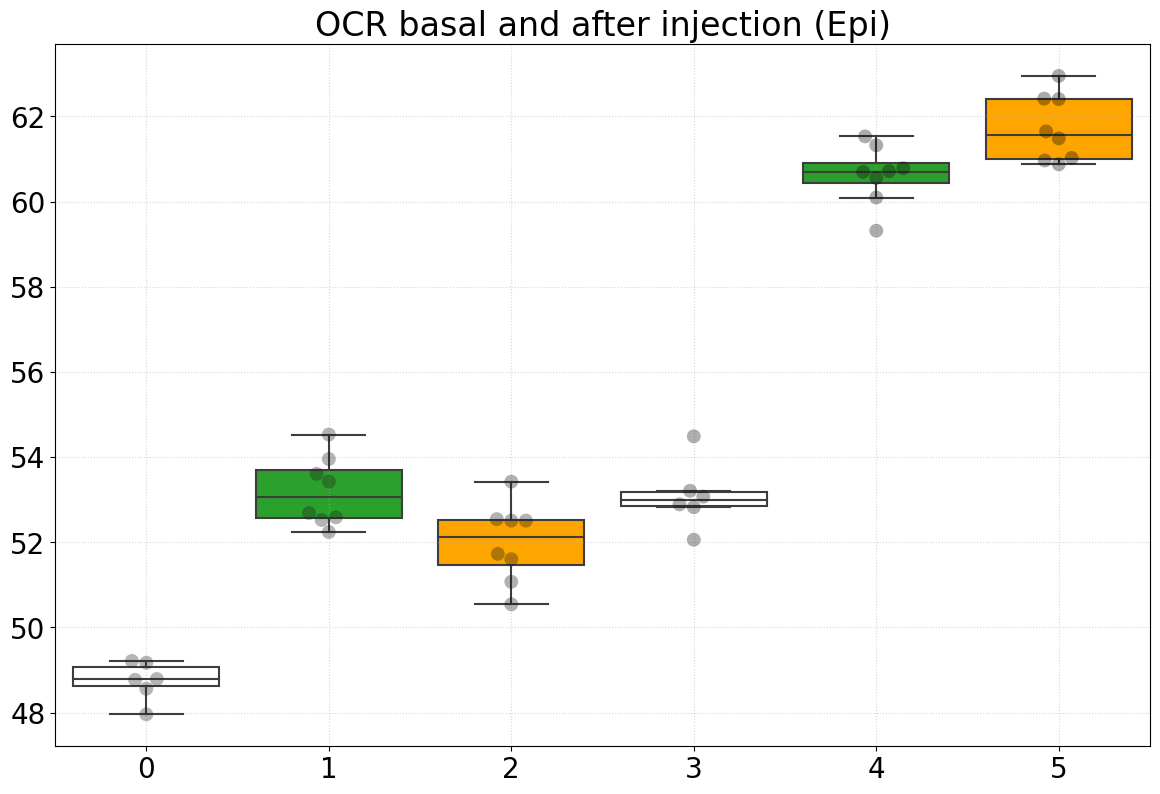

In [ ]:
# Create a boxplot
canvas = seaborn.boxplot(data=boxplot_epi, showfliers=False)

# Define the colors for the boxes
colors = ['white', '#2CA02C', '#FFA500', 'white', '#2CA02C', '#FFA500']

# Set the colors for each box
for i, box in enumerate(canvas.patches):
    box.set_facecolor(colors[i])

# Add a swarmplot on top of the boxplot
seaborn.swarmplot(data=boxplot_epi, palette='dark:black', alpha=1/3, size=10)

# Add grid and adjust layout
matplotlib.pyplot.grid(ls=':', alpha=0.5)
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.title('OCR basal and after injection (Epi)')
#matplotlib.pyplot.show()

matplotlib.pyplot.savefig('ocr.epi.boxplot.norm.png')

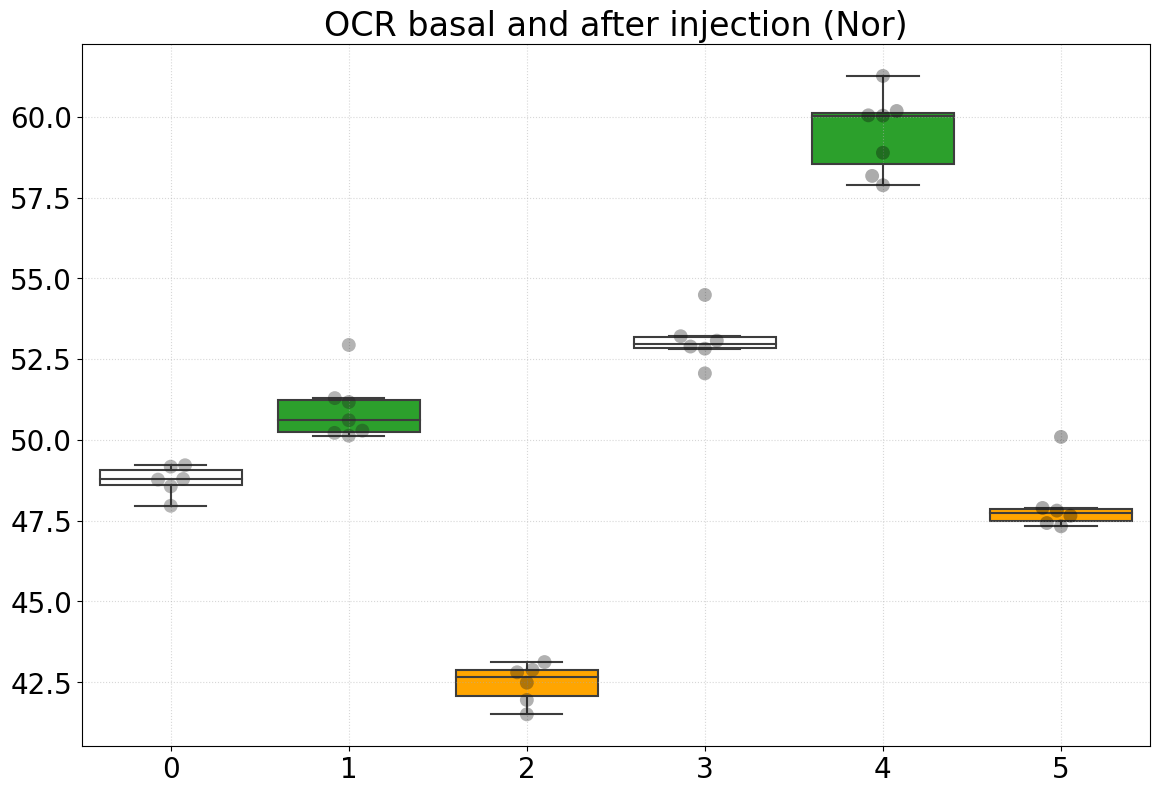

In [ ]:
# Create a boxplot
canvas = seaborn.boxplot(data=boxplot_nor, showfliers=False)

# Define the colors for the boxes
colors = ['white', '#2CA02C', '#FFA500', 'white', '#2CA02C', '#FFA500']

# Set the colors for each box
for i, box in enumerate(canvas.patches):
    box.set_facecolor(colors[i])

# Add a swarmplot on top of the boxplot
seaborn.swarmplot(data=boxplot_nor, palette='dark:black', alpha=1/3, size=10)

# Add grid and adjust layout
matplotlib.pyplot.grid(ls=':', alpha=0.5)
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.title('OCR basal and after injection (Nor)')
#matplotlib.pyplot.show()

matplotlib.pyplot.savefig('ocr.nor.boxplot.norm.png')

#**3. ECAR**

In [ ]:
boxplot_basal = []
boxplot_maximal = []

In [ ]:
ecar

time        B02        C02        D02        E02        F02  \
0    1.309187  39.377648  36.543724  34.263192  31.358227  37.767984   
1    7.764788  31.546563  29.037740  26.217748  24.987457  30.253109   
2   14.221832  31.777370  29.180992  26.892990  24.973966  30.817998   
3   20.673023  32.204257  29.477405  27.171152  24.978026  30.627171   
4   27.131237  32.373915  29.660346  27.278747  25.171714  30.713812   
5   33.590550  32.239025  29.828088  27.115451  25.047956  30.651132   
6   40.142395  62.561790  58.458616  52.152616  49.010329  57.838712   
7   46.599121  57.618357  55.385357  47.460614  44.716304  52.984848   
8   53.053343  59.152130  56.372730  48.406705  44.643984  53.780293   
9   59.591629  56.356323  52.503690  47.624378  44.350203  53.134552   
10  66.033935  52.817864  49.812032  45.181848  41.875287  50.311087   
11  72.488572  51.364247  48.373967  43.257871  40.689999  48.439099   
12  79.032928  56.004506  50.607643  45.531999  43.758182  49.364119   
13  85.496423  53.112922  49.178681  44.453462  42.222280  48.633243   
14  91.961750  49.540651  45.828734  41.105734  39.735880  46.093410   

          G02        B03        B04        B05  ...        G07        G08  \
0   35.040029  35.940119  31.628549  30.404176  ...  41.260028  47.315534   
1   28.613972  28.613713  24.781309  23.897204  ...  33.243320  38.119470   
2   27.840099  28.909709  24.474147  24.774336  ...  33.650727  38.026320   
3   28.296908  29.535275  24.484380  24.222112  ...  33.562906  37.596983   
4   28.431706  29.958170  24.884898  24.425900  ...  34.034327  38.133863   
5   28.464708  29.541867  24.257944  24.282434  ...  33.864985  37.499006   
6   53.398123  63.580577  51.402486  50.003935  ...  57.666372  63.524782   
7   48.378595  59.457796  47.721133  46.990839  ...  52.551046  57.515534   
8   49.168909  60.130431  48.062489  48.375607  ...  53.898675  57.861956   
9   48.006411  52.371027  42.091283  43.864082  ...  51.131453  56.428504   
10  44.454787  50.374668  40.215639  38.691965  ...  49.611266  53.516015   
11  43.439987  48.568998  38.933138  40.423234  ...  48.238028  51.924667   
12  43.436461  53.345842  42.018859  44.852275  ...  49.597184  55.027672   
13  42.319362  50.613789  41.070591  43.017631  ...  49.163233  53.860908   
14  40.913809  46.734959  37.499092  39.150651  ...  46.096827  51.210648   

          G09        G10        B11         C11        D11        E11  \
0   42.971208  47.823325  39.640226   29.505437  31.443908  36.354920   
1   34.503986  37.874092  31.311082   23.386828  24.383999  28.200860   
2   33.829596  37.354387  31.367637   23.485126  24.680382  28.000306   
3   33.773837  36.733965  31.913449   23.274881  24.660859  28.109194   
4   33.831515  37.145382  32.040593   23.442226  24.981255  28.122264   
5   33.583460  37.375640  31.666365   23.562932  24.920847  28.518595   
6   57.439380  59.242182  58.825607   43.964844  47.315671  54.501250   
7   52.919586  56.798430  53.306906   39.044973  42.096670  48.291591   
8   53.597296  57.277555  53.679529   39.113525  42.636911  48.311324   
9   51.718820  54.437782  52.822142   39.150273  41.552872  48.876516   
10  49.461748  54.962642  50.090661   37.257600  39.423414  46.019908   
11  48.663141  54.798403  48.822342   35.966987  37.468058  44.760811   
12  50.905636  52.991998  50.955773 -469.078777  40.057924  47.870399   
13  50.462120  53.104148  50.511854   26.204461  40.024900  47.355515   
14  45.917558  50.044620  51.051899   30.514574  37.713099  44.048498   

          F11        G11  
0   35.958608  31.330836  
1   28.193427  22.879845  
2   28.128321  21.851247  
3   28.143538  21.990865  
4   27.602264  21.698062  
5   28.169987  21.462782  
6   52.761130  38.419127  
7   46.841724  33.923706  
8   46.468313  33.760212  
9   46.947751  34.798747  
10  44.837039  33.327659  
11  43.116542  32.332410  
12  45.790459  31.945555  
13  45.465370  32.414308  
14  42.231710  31.277899  

[15 rows x 61 columns

In [ ]:
control_wells = ['B02', 'C02', 'D02', 'E02', 'F02', 'G02', 'B11', 'C11', 'D11', 'E11', 'F11', 'G11']
samples_4h_half = ['F03', 'F04', 'F05', 'F06', 'F07', 'F08', 'F09', 'F10']
samples_4h_five = ['E03', 'E04', 'E05', 'E06', 'E07', 'E08', 'E09', 'E10']

In [ ]:
control_wells_representative = ['B02', 'C02', 'D02', 'E02', 'F02', 'G02', 'B11', 'D11', 'E11', 'F11', 'G11']
samples_4h_half_representative = ['F03', 'F04', 'F05', 'F06', 'F08', 'F10']
samples_4h_five_representative = samples_4h_five

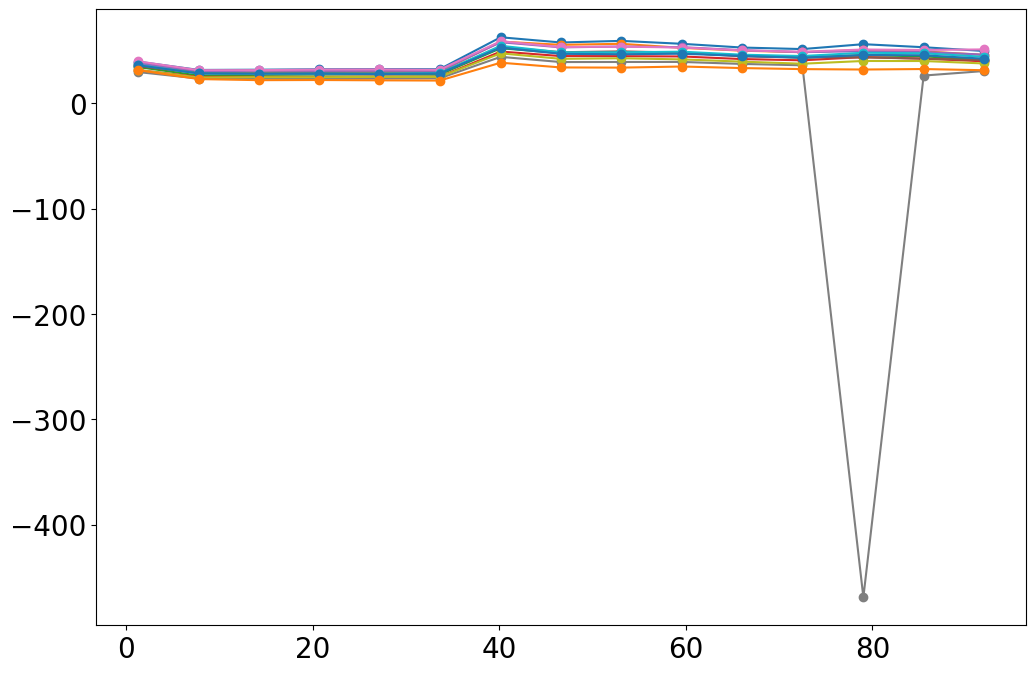

In [ ]:
matplotlib.pyplot.plot(timepoints, ecar[control_wells], 'o-')
matplotlib.pyplot.show()

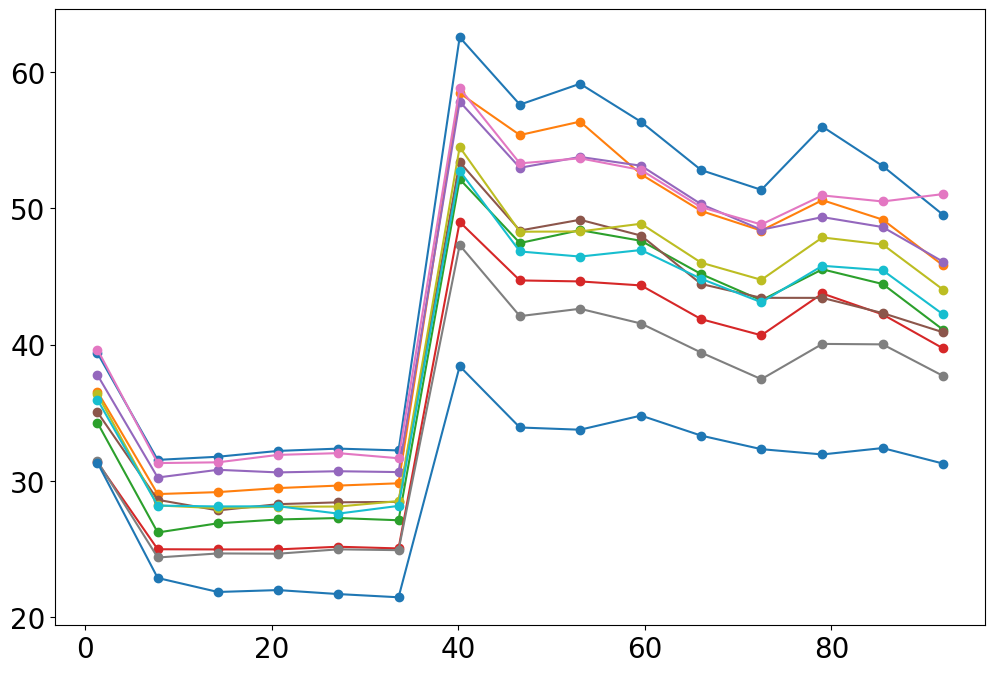

In [ ]:
matplotlib.pyplot.plot(timepoints, ecar[control_wells_representative], 'o-')
matplotlib.pyplot.show()

In [ ]:
relative_mu = ecar[control_wells_representative].mean()/ecar[control_wells_representative].mean().mean()
print(relative_mu)
normalized_black = ecar[control_wells_representative]/relative_mu

B02    1.171520
C02    1.091302
D02    0.980308
E02    0.918892
F02    1.093250
G02    0.990528
B11    1.121102
D11    0.878347
E11    1.019291
F11    0.991287
G11    0.744172
dtype: float64


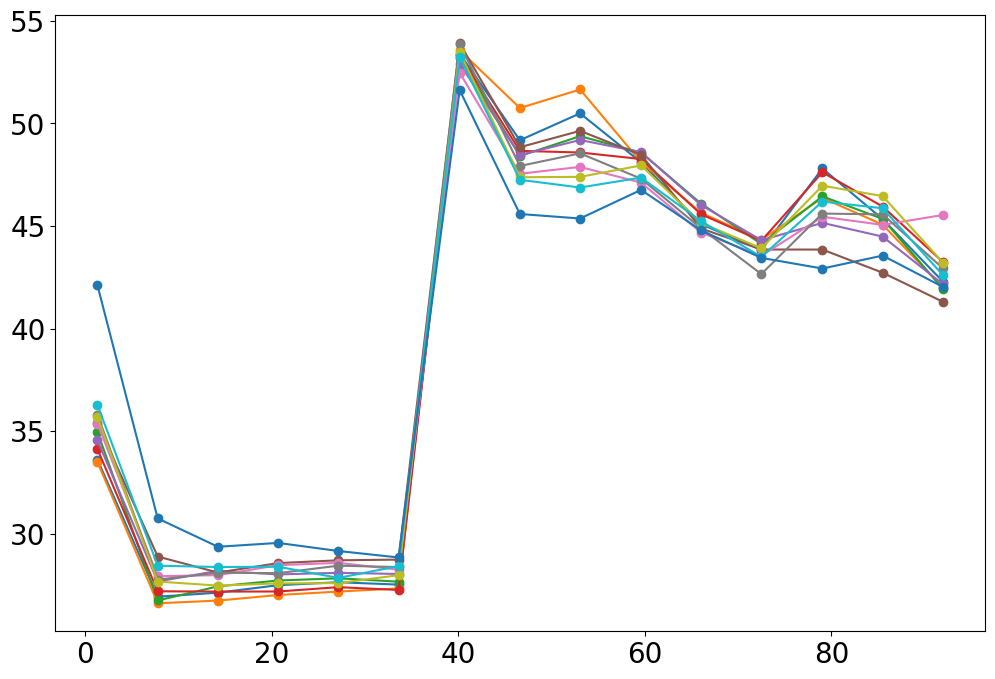

In [ ]:
matplotlib.pyplot.plot(timepoints, normalized_black, 'o-')
matplotlib.pyplot.show()

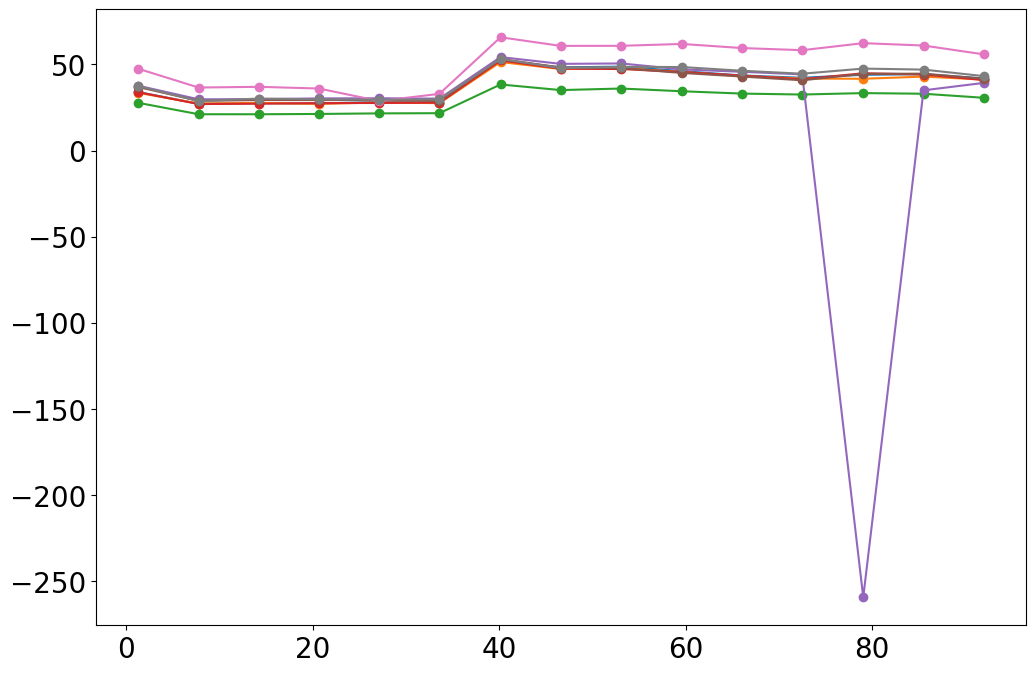

In [ ]:
matplotlib.pyplot.plot(timepoints, ecar[samples_4h_half], 'o-')
matplotlib.pyplot.show()

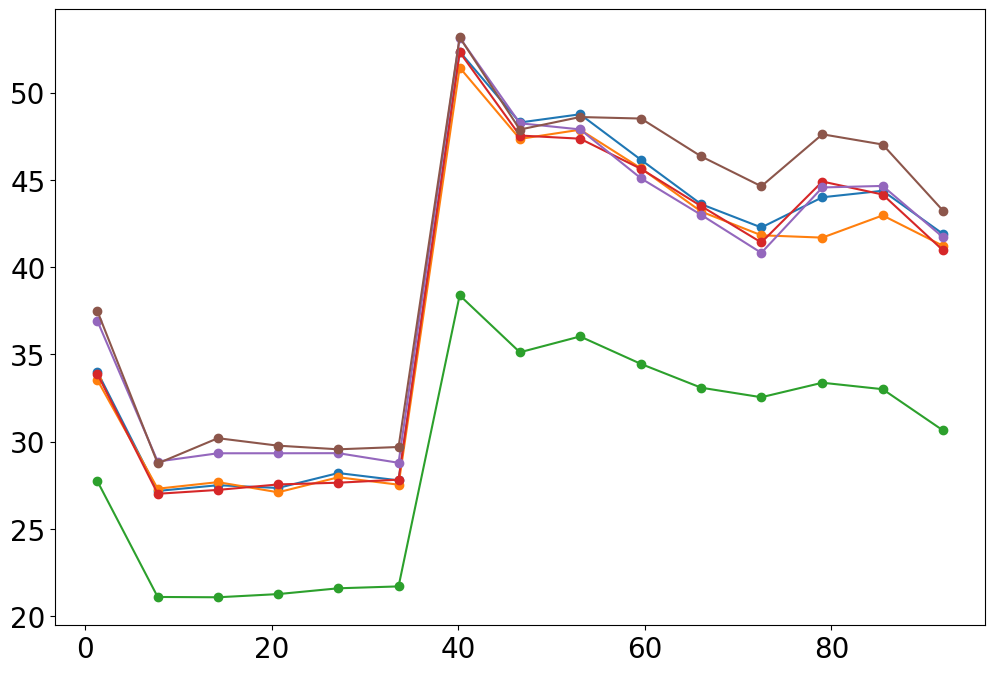

In [ ]:
matplotlib.pyplot.plot(timepoints, ecar[samples_4h_half_representative], 'o-')
matplotlib.pyplot.show()

F03    1.035486
F04    1.018807
F05    0.782564
F06    1.027009
F08    1.049623
F10    1.086512
dtype: float64


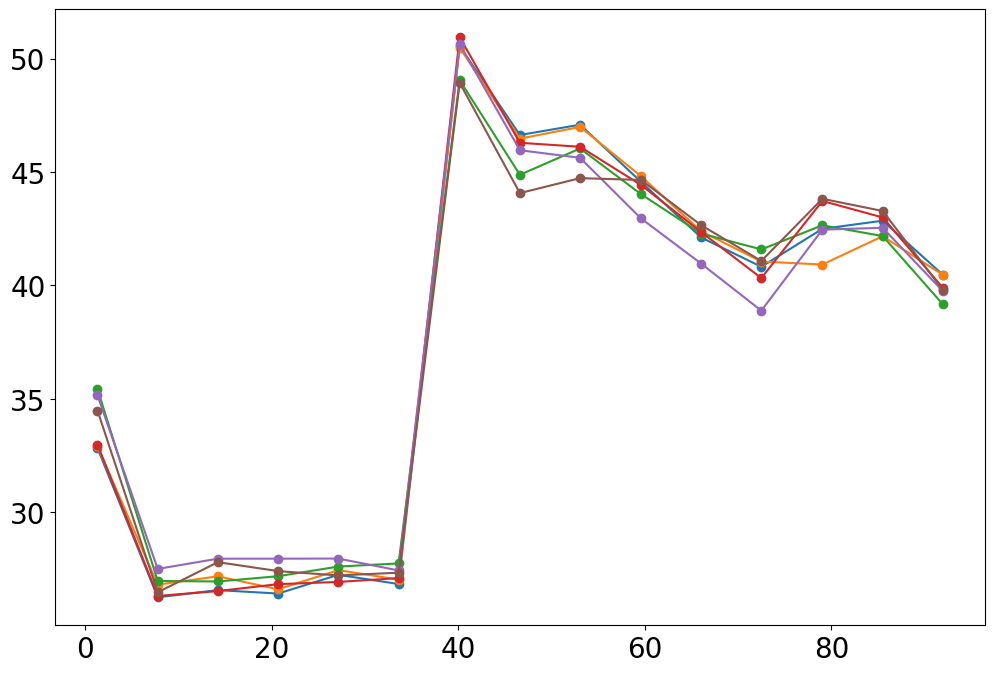

In [ ]:
relative_mu = ecar[samples_4h_half_representative].mean()/ecar[samples_4h_half_representative].mean().mean()
print(relative_mu)
normalized_green = ecar[samples_4h_half_representative]/relative_mu

matplotlib.pyplot.plot(timepoints, normalized_green, 'o-')
matplotlib.pyplot.show()

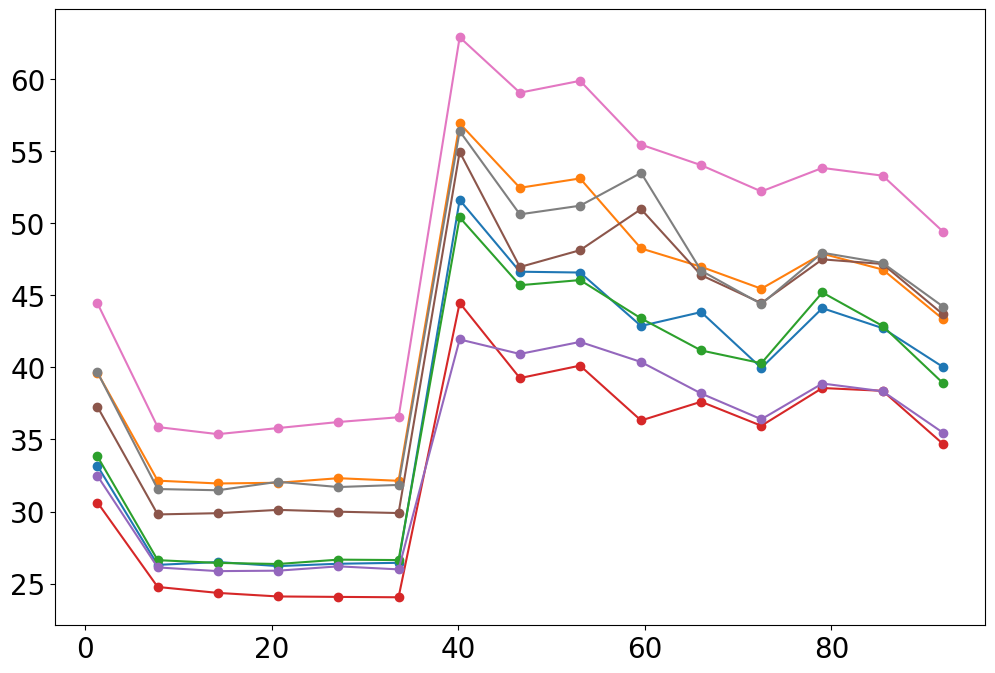

In [ ]:
matplotlib.pyplot.plot(timepoints, ecar[samples_4h_five], 'o-')
matplotlib.pyplot.show()

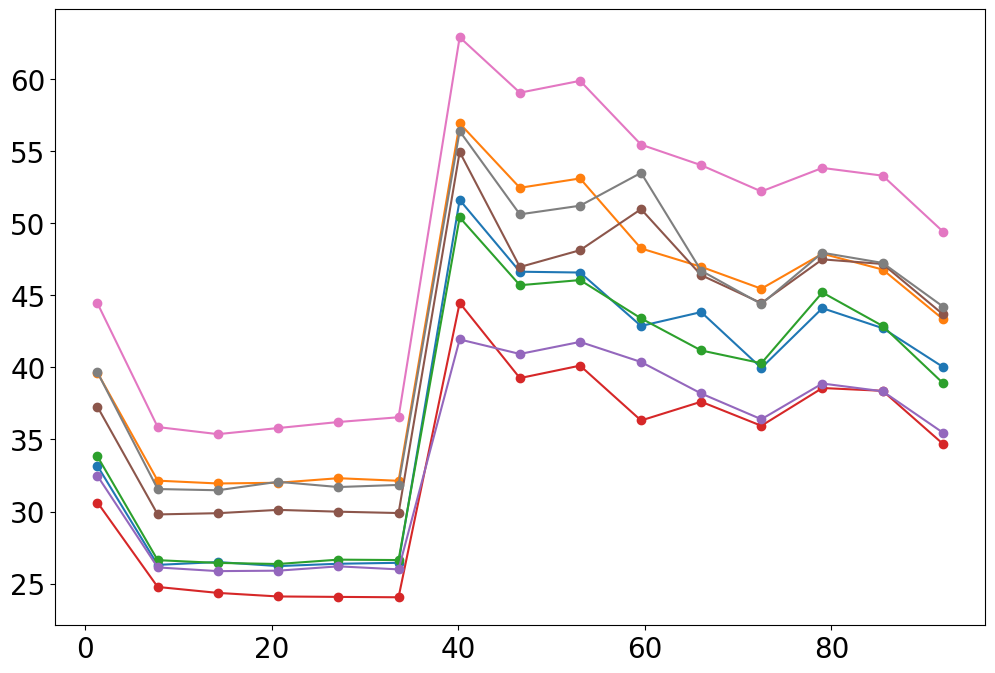

E03    0.946941
E04    1.078012
E05    0.942217
E06    0.836046
E07    0.865420
E08    1.037371
E09    1.217364
E10    1.076629
dtype: float64


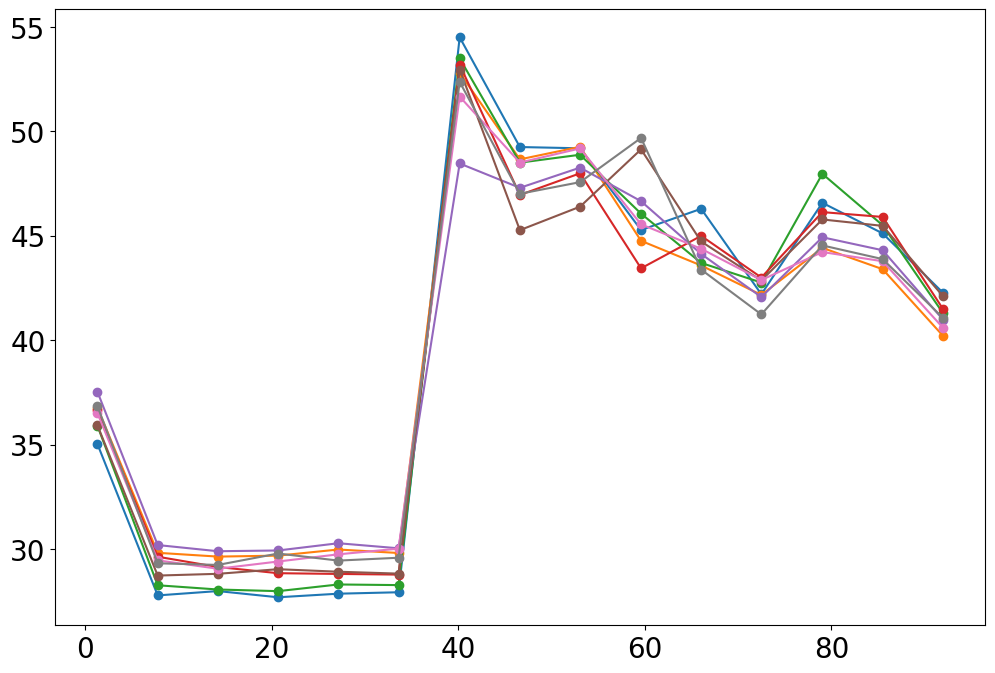

In [ ]:
matplotlib.pyplot.plot(timepoints, ecar[samples_4h_five_representative], 'o-')
matplotlib.pyplot.show()

relative_mu = ecar[samples_4h_five_representative].mean()/ecar[samples_4h_five_representative].mean().mean()
print(relative_mu)
normalized_orange = ecar[samples_4h_five_representative]/relative_mu

matplotlib.pyplot.plot(timepoints, normalized_orange, 'o-')
matplotlib.pyplot.show()

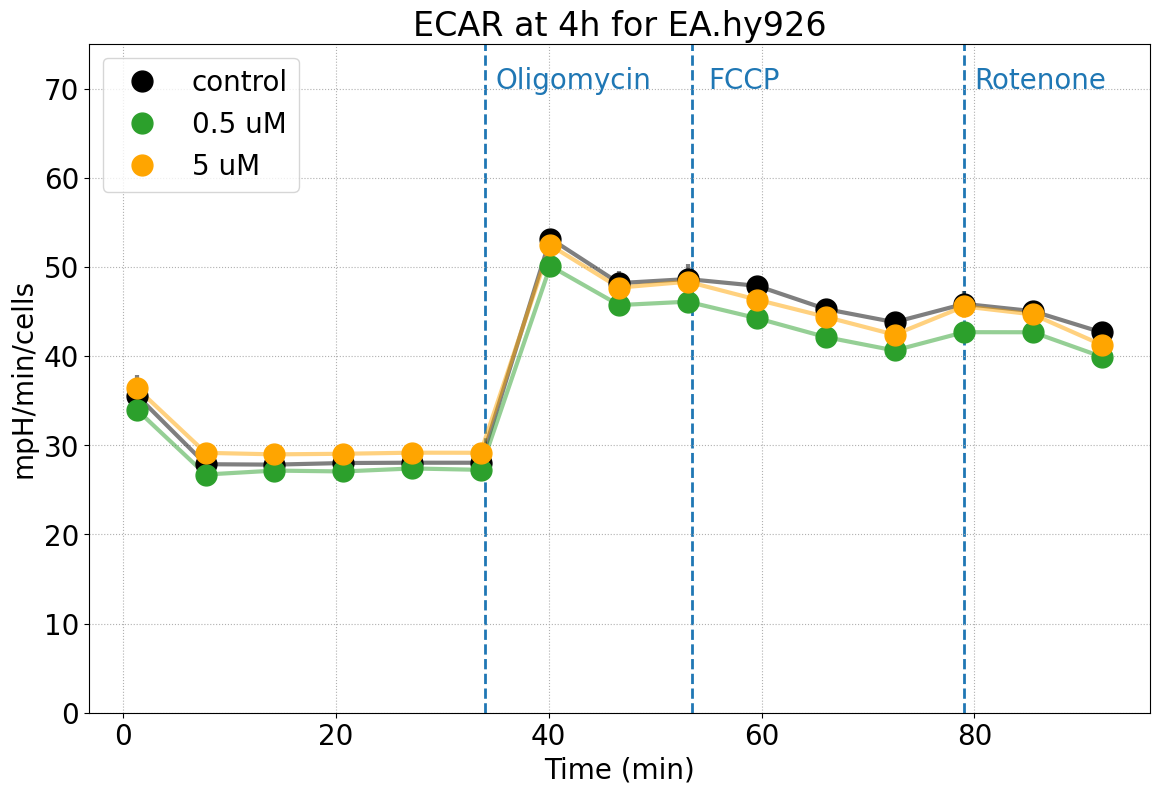

In [ ]:
mean = normalized_black.mean(axis=1)
std = normalized_black.std(axis=1)
matplotlib.pyplot.errorbar(timepoints, mean, std, lw=3, color='black', alpha=1/2)
matplotlib.pyplot.plot(timepoints, mean, 'o', color='black', ms=15, label='control', zorder=999)

mean = normalized_green.mean(axis=1)
std = normalized_green.std(axis=1)
matplotlib.pyplot.errorbar(timepoints, mean, std, lw=3, color='#2CA02C', alpha=1/2)
matplotlib.pyplot.plot(timepoints, mean, 'o', color='#2CA02C', ms=15, label='0.5 uM', zorder=999)

mean = normalized_orange.mean(axis=1)
std = normalized_orange.std(axis=1)
matplotlib.pyplot.errorbar(timepoints, mean, std, lw=3, color='#FFA500', alpha=1/2)
matplotlib.pyplot.plot(timepoints, mean, 'o', color='#FFA500', ms=15, label='5 uM', zorder=999)

matplotlib.pyplot.grid(ls=':')

matplotlib.pyplot.axvline(x=34, ls='--', lw=2, color='tab:blue', zorder=1)
matplotlib.pyplot.axvline(x=53.5, ls='--', lw=2, color='tab:blue', zorder=1)
matplotlib.pyplot.axvline(x=79, ls='--', lw=2, color='tab:blue', zorder=1)

matplotlib.pyplot.text(35, 70, 'Oligomycin', color='tab:blue')
matplotlib.pyplot.text(55, 70, 'FCCP', color='tab:blue')
matplotlib.pyplot.text(80, 70, 'Rotenone', color='tab:blue')

matplotlib.pyplot.xlabel('Time (min)')
matplotlib.pyplot.ylabel('mpH/min/cells')
matplotlib.pyplot.legend(loc=2)
matplotlib.pyplot.ylim([0, 75])
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.title('ECAR at 4h for EA.hy926')

#matplotlib.pyplot.show()

matplotlib.pyplot.savefig('ecar.4h.ea.png')

In [ ]:
a = normalized_black.iloc[5, :].to_list()
b = normalized_green.iloc[5, :].to_list()
c = normalized_orange.iloc[5, :].to_list()
boxplot_basal.append(a); boxplot_basal.append(b); boxplot_basal.append(c)

a = normalized_black.iloc[9, :].to_list()
b =  normalized_green.iloc[9, :].to_list()
c = normalized_orange.iloc[9, :].to_list()
boxplot_maximal.append(a); boxplot_maximal.append(b); boxplot_maximal.append(c)

In [ ]:
samples_24h_half = ['C03', 'C04', 'C05', 'C06', 'C07', 'C08', 'C09', 'C10']
samples_24h_five = ['B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B09', 'B10']

In [ ]:
samples_24h_half_representative = ['C03', 'C05', 'C06', 'C07', 'C08', 'C10']
samples_24h_five_representative = ['B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B09']

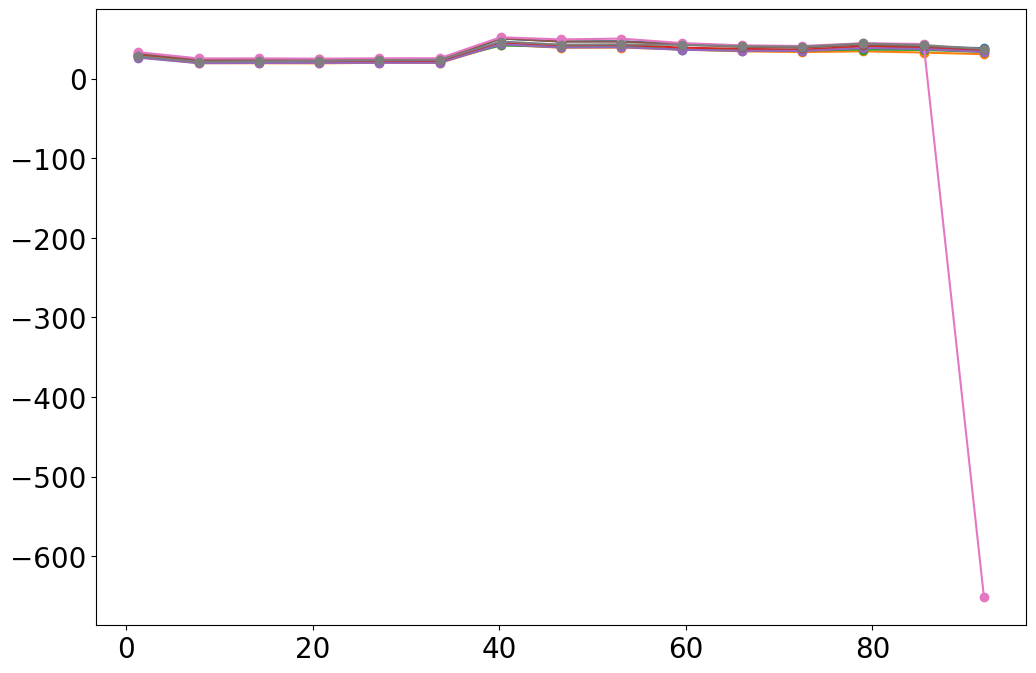

In [ ]:
matplotlib.pyplot.plot(timepoints, ecar[samples_24h_half], 'o-')
matplotlib.pyplot.show()

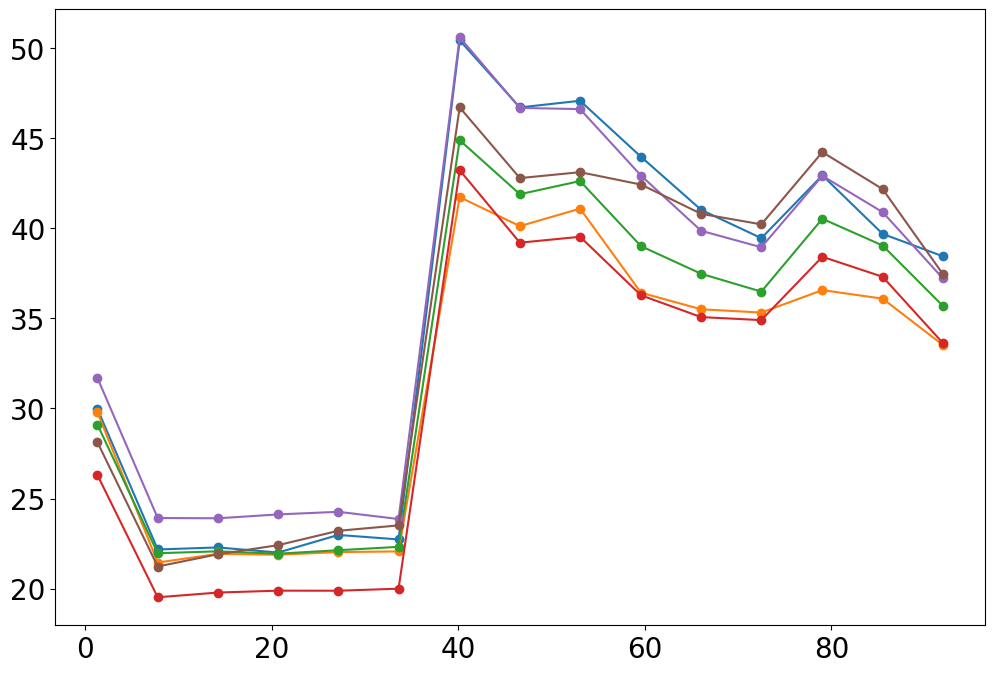

C03    1.054529
C05    0.942796
C06    0.985709
C07    0.917850
C08    1.067508
C10    1.031609
dtype: float64


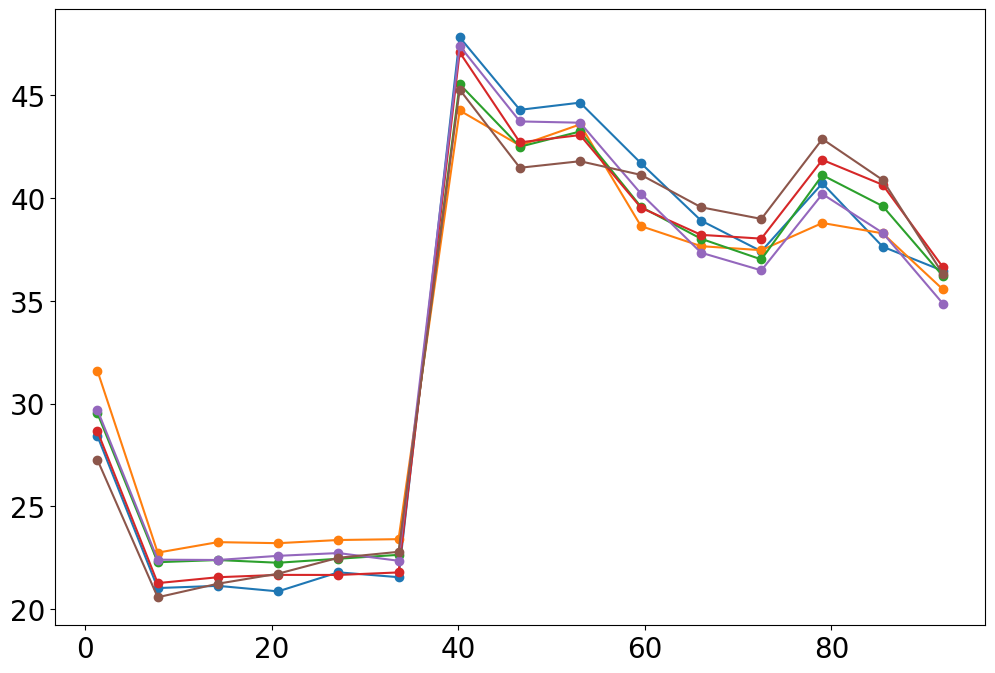

In [ ]:
matplotlib.pyplot.plot(timepoints, ecar[samples_24h_half_representative], 'o-')
matplotlib.pyplot.show()

relative_mu = ecar[samples_24h_half_representative].mean()/ecar[samples_24h_half_representative].mean().mean()
print(relative_mu)
normalized_green = ecar[samples_24h_half_representative]/relative_mu

matplotlib.pyplot.plot(timepoints, normalized_green, 'o-')
matplotlib.pyplot.show()

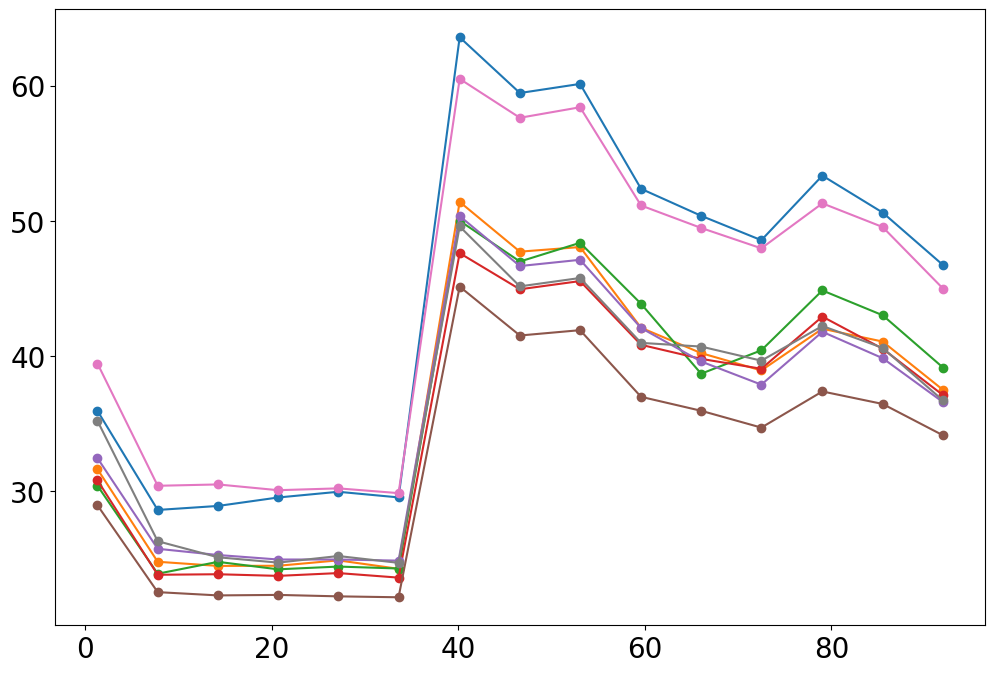

In [ ]:
matplotlib.pyplot.plot(timepoints, ecar[samples_24h_five], 'o-')
matplotlib.pyplot.show()


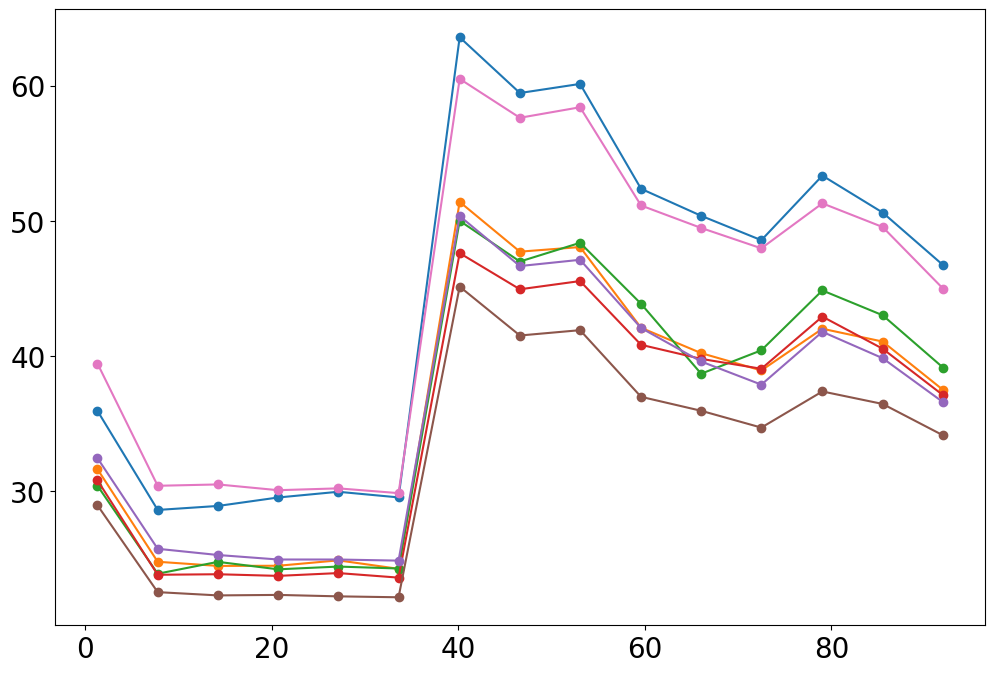

B03    1.176395
B04    0.957651
B05    0.964435
B06    0.930488
B07    0.951684
B08    0.853943
B09    1.165405
dtype: float64


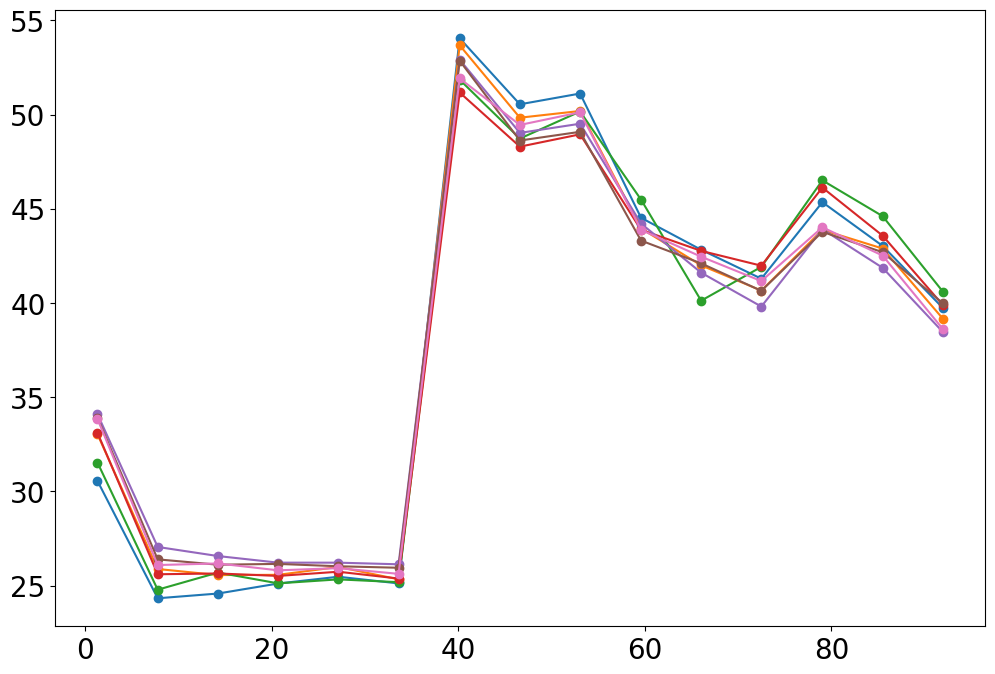

In [ ]:
matplotlib.pyplot.plot(timepoints, ecar[samples_24h_five_representative], 'o-')
matplotlib.pyplot.show()

relative_mu = ecar[samples_24h_five_representative].mean()/ecar[samples_24h_five_representative].mean().mean()
print(relative_mu)
normalized_orange = ecar[samples_24h_five_representative]/relative_mu

matplotlib.pyplot.plot(timepoints, normalized_orange, 'o-')
matplotlib.pyplot.show()

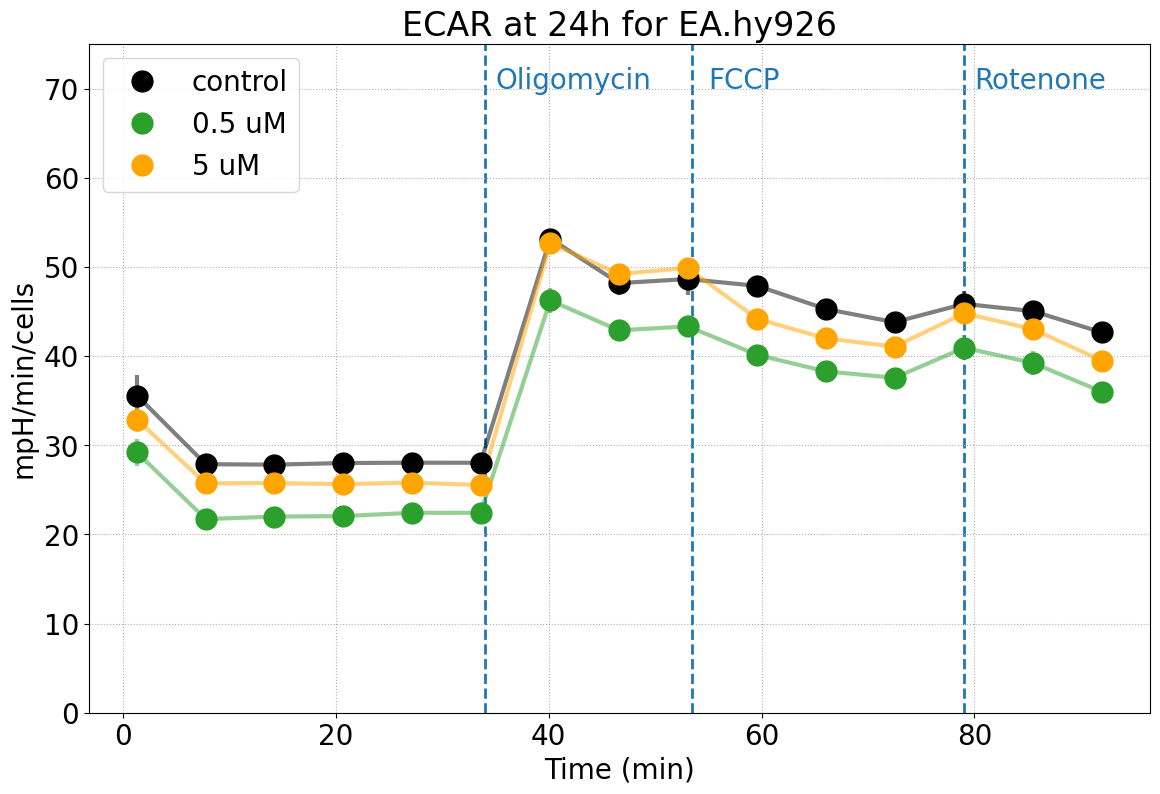

In [ ]:
mean = normalized_black.mean(axis=1)
std = normalized_black.std(axis=1)
matplotlib.pyplot.errorbar(timepoints, mean, std, lw=3, color='black', alpha=1/2)
matplotlib.pyplot.plot(timepoints, mean, 'o', color='black', ms=15, label='control', zorder=999)

mean = normalized_green.mean(axis=1)
std = normalized_green.std(axis=1)
matplotlib.pyplot.errorbar(timepoints, mean, std, lw=3, color='#2CA02C', alpha=1/2)
matplotlib.pyplot.plot(timepoints, mean, 'o', color='#2CA02C', ms=15, label='0.5 uM', zorder=999)

mean = normalized_orange.mean(axis=1)
std = normalized_orange.std(axis=1)
matplotlib.pyplot.errorbar(timepoints, mean, std, lw=3, color='#FFA500', alpha=1/2)
matplotlib.pyplot.plot(timepoints, mean, 'o', color='#FFA500', ms=15, label='5 uM', zorder=999)

matplotlib.pyplot.grid(ls=':')

matplotlib.pyplot.axvline(x=34, ls='--', lw=2, color='tab:blue', zorder=1)
matplotlib.pyplot.axvline(x=53.5, ls='--', lw=2, color='tab:blue', zorder=1)
matplotlib.pyplot.axvline(x=79, ls='--', lw=2, color='tab:blue', zorder=1)

matplotlib.pyplot.text(35, 70, 'Oligomycin', color='tab:blue')
matplotlib.pyplot.text(55, 70, 'FCCP', color='tab:blue')
matplotlib.pyplot.text(80, 70, 'Rotenone', color='tab:blue')

matplotlib.pyplot.xlabel('Time (min)')
matplotlib.pyplot.ylabel('mpH/min/cells')
matplotlib.pyplot.legend(loc=2)
matplotlib.pyplot.ylim([0, 75])
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.title('ECAR at 24h for EA.hy926')
#matplotlib.pyplot.show()

matplotlib.pyplot.savefig('ecar.24h.ea.png')

In [ ]:
b = normalized_green.iloc[5, :].to_list()
c = normalized_orange.iloc[5, :].to_list()
boxplot_basal.append(b); boxplot_basal.append(c)

b = normalized_green.iloc[9, :].to_list()
c = normalized_orange.iloc[9, :].to_list()
boxplot_maximal.append(b); boxplot_maximal.append(c)

##**3.3. boxplots**

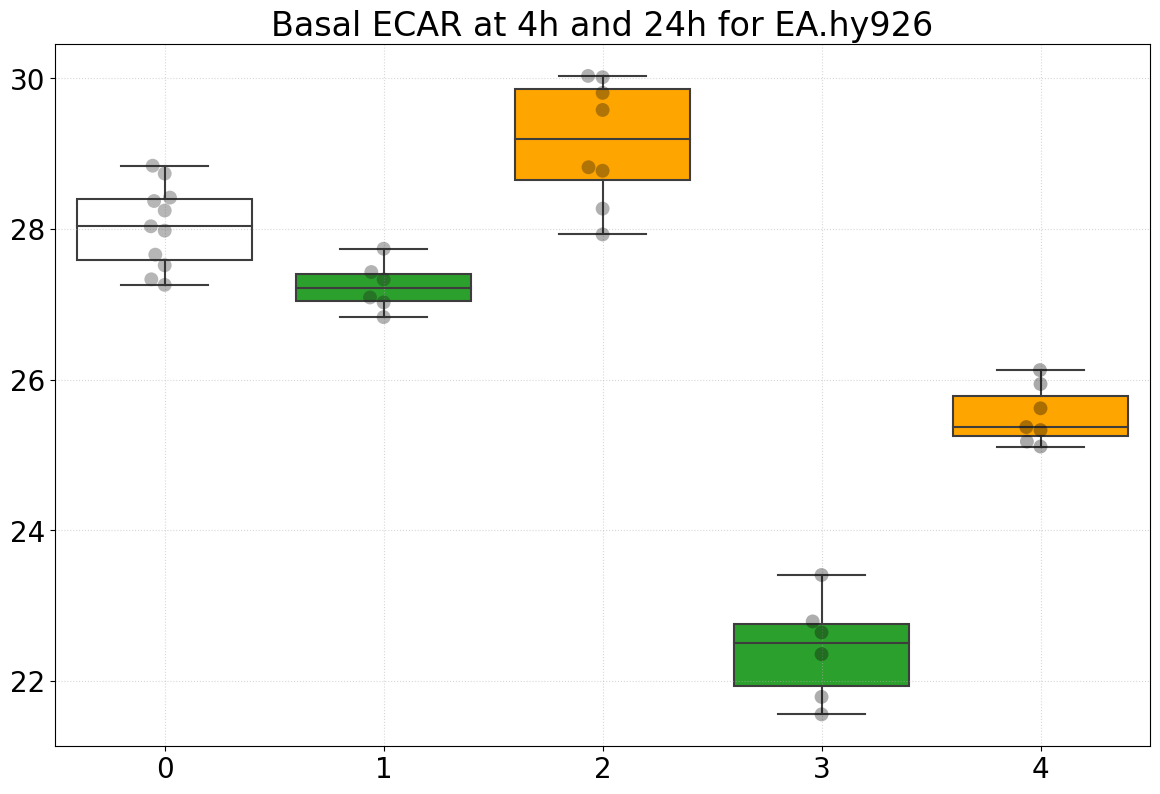

In [ ]:
# Create a boxplot
canvas = seaborn.boxplot(data=boxplot_basal, showfliers=False)

# Define the colors for the boxes
colors = ['white', '#2CA02C', '#FFA500', '#2CA02C', '#FFA500']

# Set the colors for each box
for i, box in enumerate(canvas.patches):
    box.set_facecolor(colors[i])

# Add a swarmplot on top of the boxplot
seaborn.swarmplot(data=boxplot_basal, palette='dark:black', alpha=1/3, size=10)

# Add grid and adjust layout
matplotlib.pyplot.grid(ls=':', alpha=0.5)
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.title('Basal ECAR at 4h and 24h for EA.hy926')
#matplotlib.pyplot.show()


matplotlib.pyplot.savefig('ecar.basal.ea.png')

In [ ]:
for i in range(len(boxplot_basal)):
    stat, pvalue = scipy.stats.mannwhitneyu(boxplot_basal[0], boxplot_basal[i])
    print(stat, pvalue)

    a = numpy.mean(boxplot_basal[0])
    b = numpy.mean(boxplot_basal[i])
    fc = b / a
    print('\t', a, b, fc)

60.5 1.0
	 28.036356022717804 28.036356022717804 1.0
59.0 0.007110536522301229
	 28.036356022717804 27.2413375335659 0.9716433017005598
13.0 0.009102696409197957
	 28.036356022717804 29.15423949590211 1.0398726379518968
66.0 0.00016160310277957336
	 28.036356022717804 22.423388782744652 0.7997968339599848
77.0 6.284565108094519e-05
	 28.036356022717804 25.525891777167494 0.9104568281442822


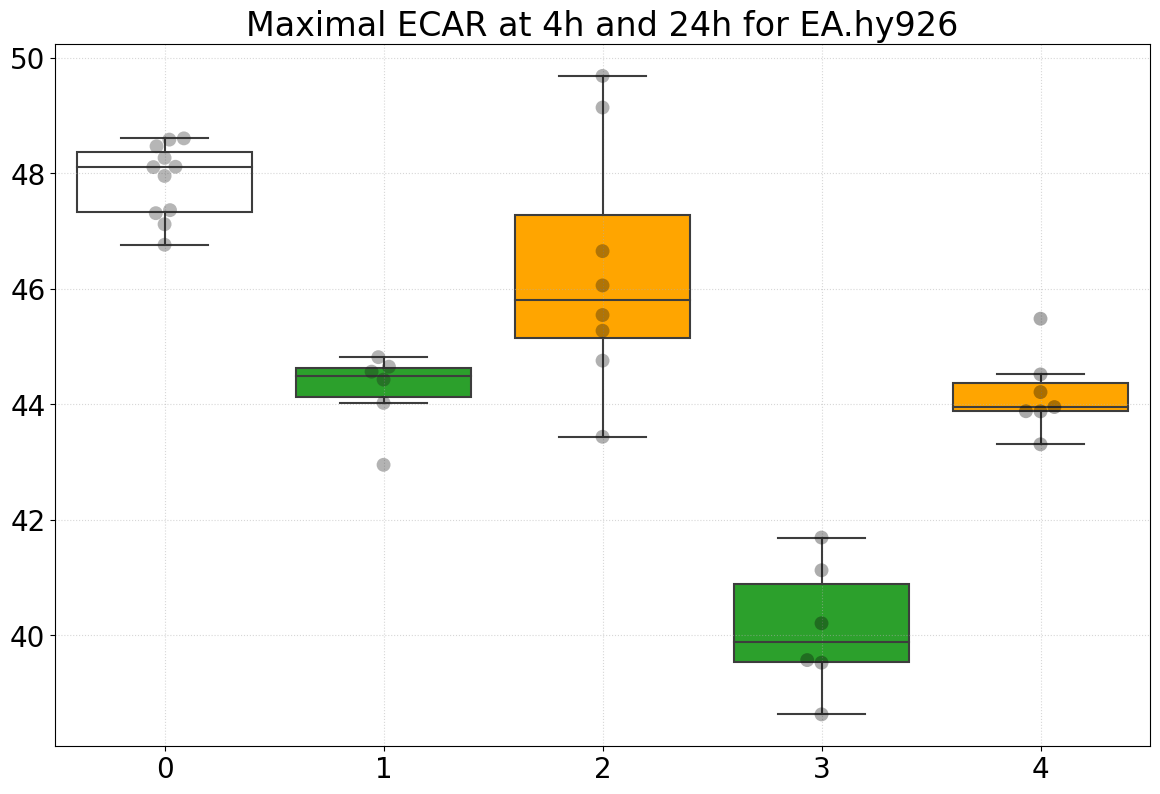

In [ ]:
# Create a boxplot
canvas = seaborn.boxplot(data=boxplot_maximal, showfliers=False)

# Define the colors for the boxes
colors = ['white', '#2CA02C', '#FFA500', '#2CA02C', '#FFA500']

# Set the colors for each box
for i, box in enumerate(canvas.patches):
    box.set_facecolor(colors[i])

# Add a swarmplot on top of the boxplot
seaborn.swarmplot(data=boxplot_maximal, palette='dark:black', alpha=1/3, size=10)

# Add grid and adjust layout
matplotlib.pyplot.grid(ls=':', alpha=0.5)
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.title('Maximal ECAR at 4h and 24h for EA.hy926')
#matplotlib.pyplot.show()


matplotlib.pyplot.savefig('ecar.maximal.ea.png')

In [ ]:
for i in range(len(boxplot_maximal)):
    stat, pvalue = scipy.stats.mannwhitneyu(boxplot_maximal[0], boxplot_maximal[i])
    print(stat, pvalue)

    a = numpy.mean(boxplot_maximal[0])
    b = numpy.mean(boxplot_maximal[i])
    fc = b / a
    print('\t', a, b, fc)

60.5 1.0
	 47.87526904807714 47.87526904807714 1.0
66.0 0.00016160310277957336
	 47.87526904807714 44.2399456432079 0.9240667785862762
66.0 0.07541478129713425
	 47.87526904807714 46.317618823822855 0.9674644079244741
66.0 0.00016160310277957336
	 47.87526904807714 40.128763585336316 0.838194006701839
77.0 6.284565108094519e-05
	 47.87526904807714 44.175940044016514 0.922729854523727
